<a href="https://colab.research.google.com/github/emmaafarrington/UT_AI-MachineLearning/blob/Personal-Projects/AdvancedMachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# connect drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading dataset
churn = pd.read_csv('/content/drive/MyDrive/AI & Machine Learning/BankChurners.csv')

In [ ]:
# make a copy of original dataset
df = churn.copy()

## Data Overview

- Observations
- Sanity checks

###Checking the Shape of the Dataset

In [ ]:
df.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns.

### Display First/Last 10 Rows of Data Set

In [ ]:
# first 10 rows of data
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6             NaN        Married         $120K +          Gold   
7     High School            NaN     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   
5              36                         3                       1   
6              46                         6                       1   
7              27                         2                       2   
8              36                         5                       2   
9              36                         6                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   
5                      2      4010.000                 1247         2763.000   
6                      3     34516.000                 2264        32252.000   
7                      2     29081.000                 1396        27685.000   
8                      0     22352.000                 2517        19835.000   
9                      3     11656.000                 1677         9979.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   

In [ ]:
# last 10 rows of data
df.tail(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10117  712503408  Existing Customer            57      M                2   
10118  713755458  Attrited Customer            50      M                1   
10119  716893683  Attrited Customer            55      F                3   
10120  710841183  Existing Customer            54      M                1   
10121  713899383  Existing Customer            56      F                1   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10117        Graduate        Married    $80K - $120K          Blue   
10118             NaN            NaN    $80K - $120K          Blue   
10119      Uneducated         Single             abc          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10117              40                         6                       3   
10118              36                         6                       3   
10119              47                         4                       3   
10120              34                         5                       2   
10121              50                         4                       1   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10117                      4     17925.000                 1909   
10118                      4      9959.000                  952   
10119                      3     14657.000                 2517   
10120                      0     13940.000                 2109   
10121                      4      3688.000                  606   
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117        16016.000                 0.712            17498             111   
10118         9007.000                 0.825            10310              63   
10119        12140.000                 0.166             6009              53   
10120        11831.000                 0.660            15577             114   
10121         3082.000                 0.570            14596             120   
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         

* We can see that there appears to be some NaN values in the marital_status and education_level columns, as well as a variable 'abc' in the income_category column, indicating there are some missing values in those columns.


###Checking Data Types of Columns

In [ ]:
# checking data types of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_



*   There are 15 numerical variables and 6 object type variables.
*   There appear to be missing values in the Education_Level and Marital_Status columns.



### Checking for Duplicate Values

In [ ]:
# check for duplicate values
df.duplicated().sum()

0

* There are no duplicate values in the dataset.

### Check for Missing Values

In [ ]:
# checking count for missing values
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# percent of missing values
round(df.isnull().sum()/df.isnull().count() * 100,2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* Education_Level column has 15% missing values out of the total observations
* Marital_Status column has 7.4% missing values out of the total observations.
* We will impute these values after we split the data into train, validation, and test sets to avoid data leakage.

### Statistical Summary

In [ ]:
# view statistical summary of the dataset
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

#### Observations:
* CLIENTUM: values appear to all be unique IDs, so we will drop this column
* Customer_Age: Avg age of customers is approximately 46 years, with the youngest being 26 and the oldest being 73. Majority of customers are between 41-52 years.
* Depedent_Count: On avg, customers have around 2 depedents with the minimum being 0, and max being 5. Distribution appears to be slightly positively skewed as the mean is higher than the median.
* Months_on_book: On avg, customers have been associated with this bank for 36 months, with most customers falling between 31-40 months.
* Credit_Limit: Avg credit limit is around 8,632 dollars with a range of 1,438 dollars to $34,516 . There is a lot of variability here which we will look into more.
* Total_Revolving_Bal: Avg total revolving balance on credit cards is around 1163 dollars with a range from 0 dollars to 2517 dollars.
* Total_Trans_Amt: Customers on avg made transactions totalling approximately 4404 dollars over the last 12 months, with a range of 510 dollars to 18,484 dollars.
* Total_Trans_Ct: Avg total transaction count in last 12 months is around 65, with a range from 10-139. There appears to be a lot of variability in the number of transactions made by customers.
* Avg_Utilization_Ratio: Avg utilization ratio is approximately .275, which means on avg, customers use approximately 27.5% of their available credit.

### Categorical Summary

In [ ]:
# view categorical summary of data
df.describe(include=["object"]).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

#### Observations:

* Attrition_Flag: This column has 2 unique values, with "Existing Customer" being the most frequent category, occurring 8500 times.
* Gender: There are 2 unique genders, with "F" (female) being most frequent, appearing 5358 times.
* Education_Level: This column has 6 unique educational levels, with "Graduate" being the most common, appearing 3128 times.
* Marital_Status: There are 3 unique marital statuses, with "Married" being the most frequent, occuring 4687 times.
* Income_Category: This column has 6 unique income categories, with "Less than $40K" being the most common, occurring 3561 times.
* Card_Category: This variable has 4 unique card categories, with "Blue" being the most frequent, occcuring 9436 times.

In [ ]:
# printing the number of occurences of each unique value in each categorical column
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

* We can see that 1112 values are listed as abc in the Income_Category column. These should be considered missing values.

In [ ]:
# dropping CLIENTNUM column as they are all unique IDs
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# creating copy of data for EDA
data = df.copy()

In [ ]:
data["Income_Category"].replace("abc", "Unknown", inplace=True)

In [ ]:
# Replacing Existing and Attrited customers to 0 and 1 respectively for after analysis
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**: ANSWERED IN ANALYSIS

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

#### Customer_Age

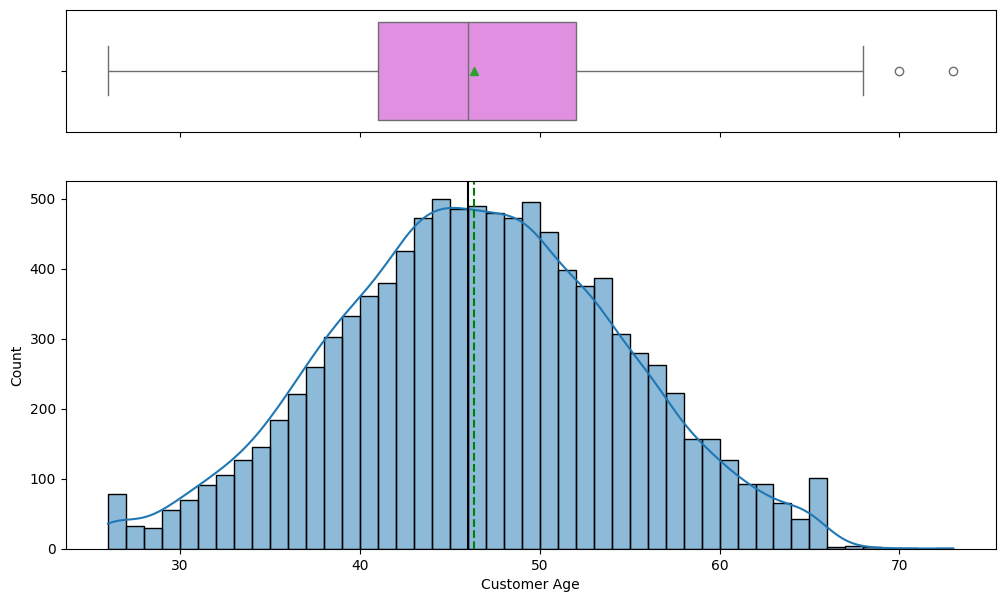

In [ ]:
# histogram_boxplot for Customer age
histogram_boxplot(data, "Customer_Age", kde=True)
plt.xlabel("Customer Age");

* Distribution for Customer Age appears approximately normally distributed with the median and mean being approximately the same at around 46 years old.
* There are a few outliers on the upper end.

#### Months_on_book

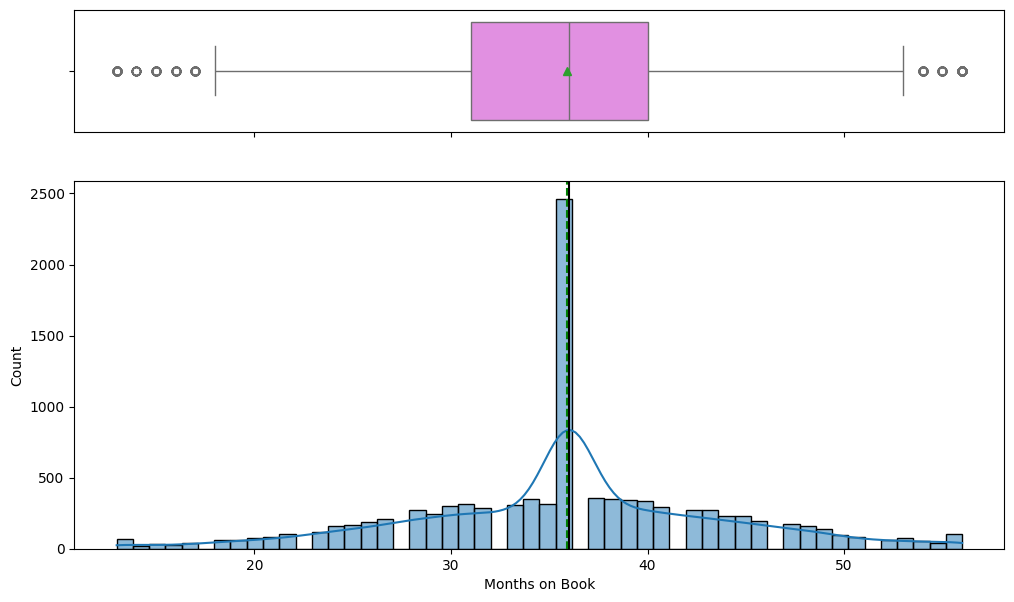

In [ ]:
# histogram_boxplot for months on book
histogram_boxplot(data, "Months_on_book", kde=True)
plt.xlabel("Months on Book");

* There is a peak in the data at around 36 months on the book, suggesting most customers have been associated with the bank for about 3 years.
* There are outliers on both sides of the data.

#### Credit_Limit

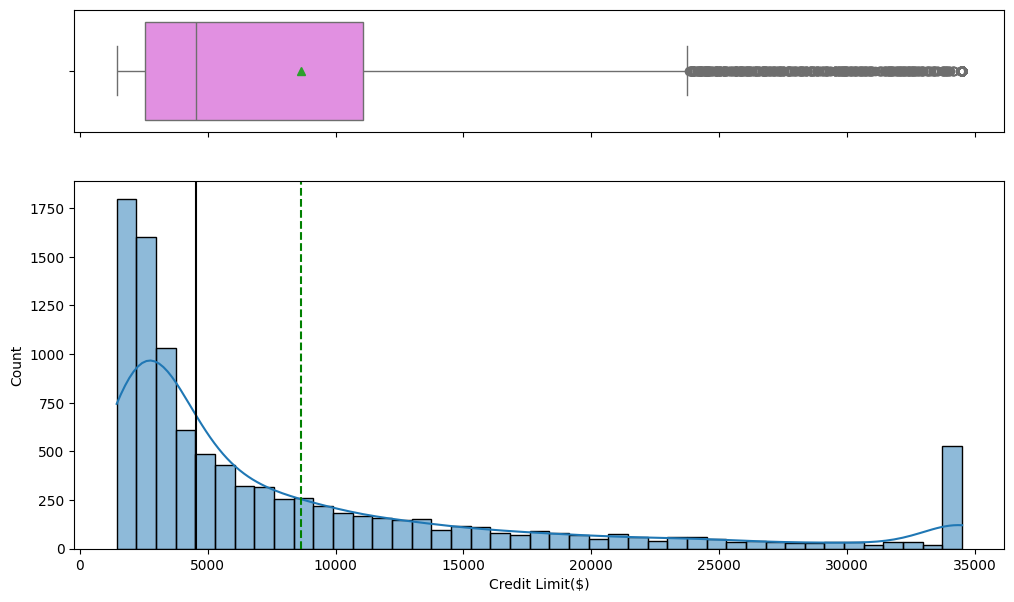

In [ ]:
# histogram_boxplot for credit limit
histogram_boxplot(data, "Credit_Limit", kde=True)
plt.xlabel("Credit Limit($)");

* Distribution for credit_limit is right skewed with many outliers.
* From the boxplot, we can see that customers with above ~ 24,00 usd of credit are outliers.

#### Total_Revolving_Bal

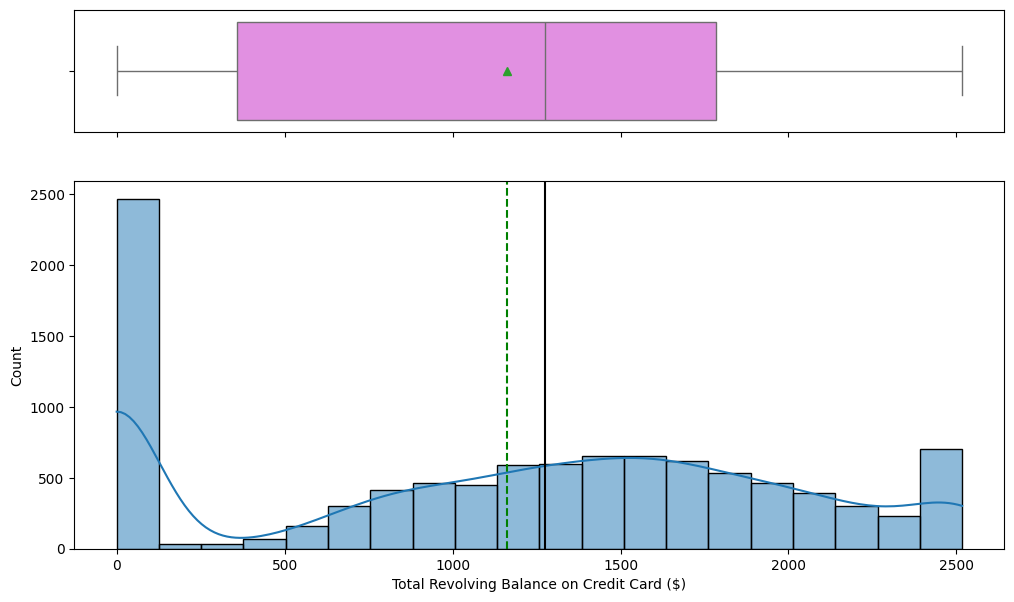

In [ ]:
# histogram_boxplot for Total Revolving Balance
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)
plt.xlabel("Total Revolving Balance on Credit Card ($)");

* We can see that many customers have a total revolving balance of 0, meaning that many of the customers pay their balance on time.
* There are no outliers, but the data appears to be pretty spread out indicating a lot of variability in total revolving balances between customers.  

#### Avg_Open_To_Buy

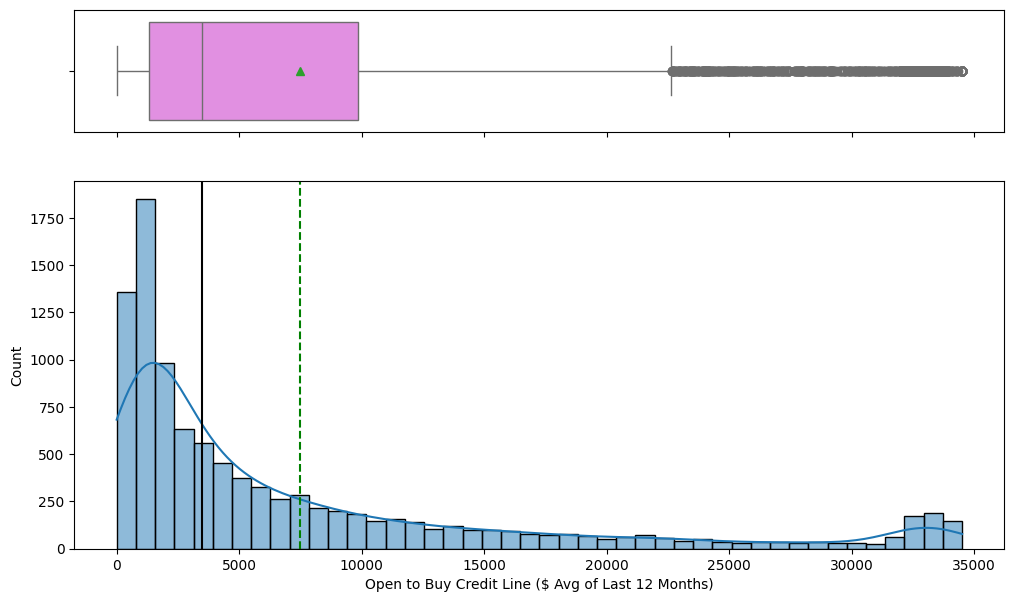

In [ ]:
# histogram_boxplot for Avg open to buy
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)
plt.xlabel("Open to Buy Credit Line ($ Avg of Last 12 Months)");

* Distribution of avg_open_to_buy is right skewed with many outliers.
* This indicates that most customers have between 1,000 USD and 10,000 USD left to use on their credit card on average over the last 12 months.
* We can also see that around 1300 customers have 0 USD leftover, indicting some customers have maxed out their credit card limit.
* The outliers indicate that some customers have a significantly higher credit card limit, and that they did not spend much of it.

#### Total_Trans_Ct

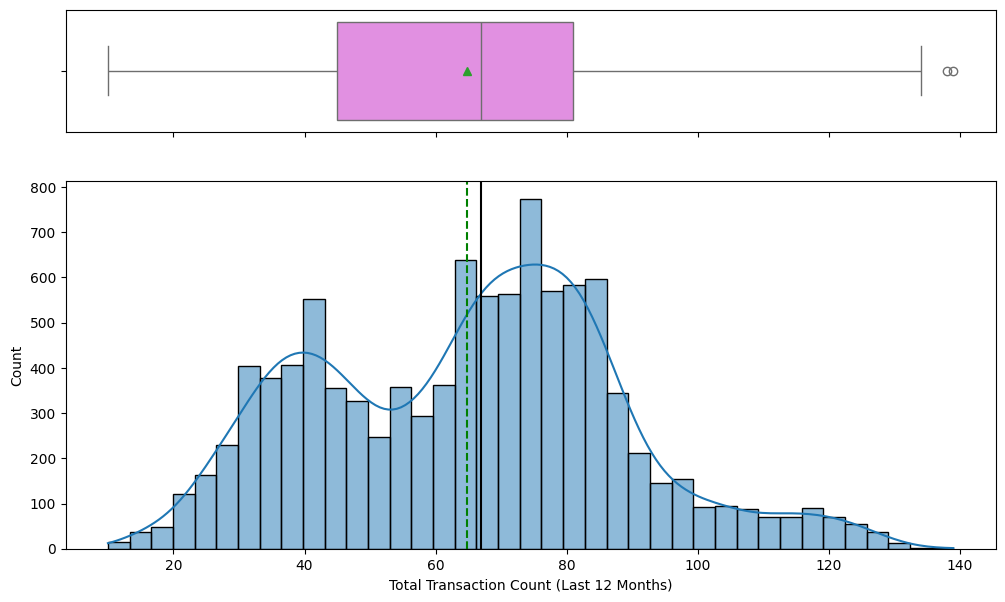

In [ ]:
# histogram_boxplot for total transaction count
histogram_boxplot(data, "Total_Trans_Ct", kde=True)
plt.xlabel("Total Transaction Count (Last 12 Months)");

* The data is slightly left skewed, and the data has more observations clustered around the higher end of the distribution.  
* The mean at around 65 is slightly lower than the median at around 67.
* The minimum number of transactions in the last 12 months was 10, while the highest was 139.

Total_Amt_Chng_Q4_Q1

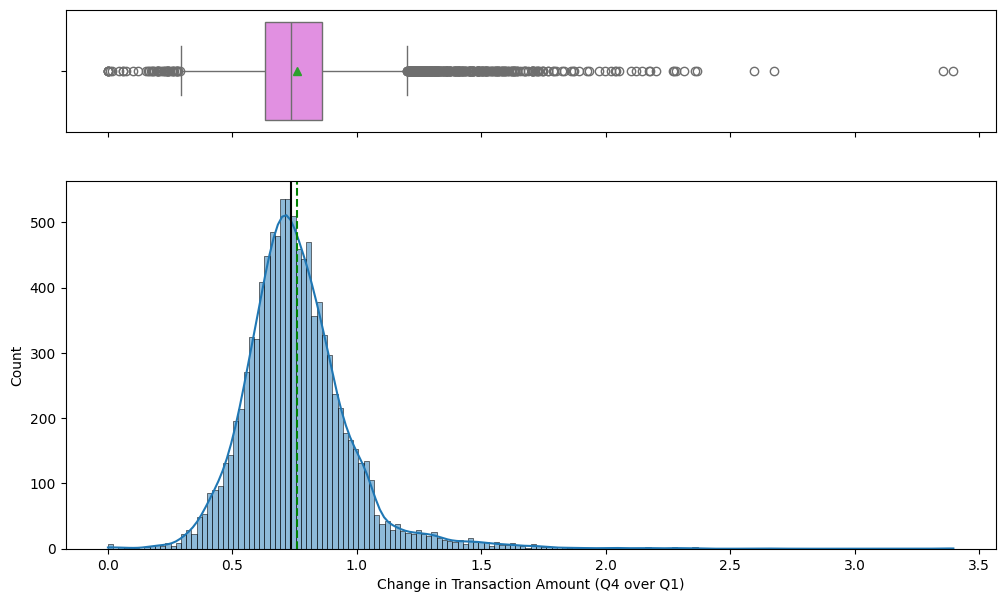

In [ ]:
# histogram_boxplot for change in transaction count from Q4 over Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)
plt.xlabel("Change in Transaction Amount (Q4 over Q1)");

* There is a moderate right skewness, but it appears to be a mostly normal distribution.
* There are many outliers on both ends of the distribution.
* Most of the data falls between ~0.6 and ~0.8, with the highest change being ~3.4, and the lowest being 0.

####**Question 1: How is the total transaction amount distributed?**

#### Total_Trans_Amt

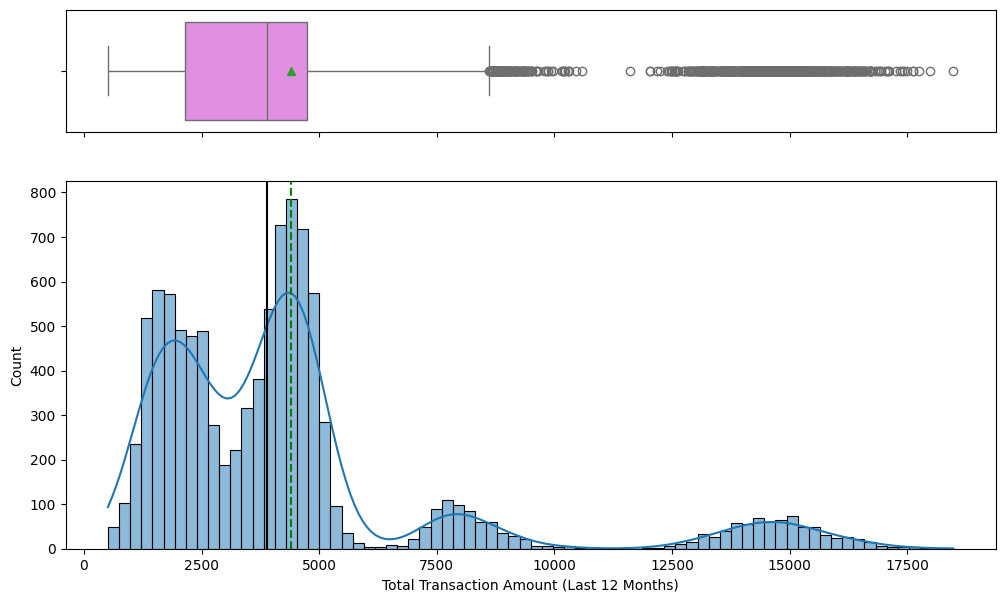

In [ ]:
# histogram_boxplot for Total Transaction Amount for the last 12 months
histogram_boxplot(data, "Total_Trans_Amt", kde=True)
plt.xlabel("Total Transaction Amount (Last 12 Months)");

* Total transacton amount has a lot of variability and a lot of outliers above the upper quartile.
* There is a moderate right skewness, with two peaks.
* Most of the data falls between ~2100 to ~4700.
* The minimum transaction amount over the last 12 months was ~500, and the maximum was more than 17,500. This shows that some customers barely use their credit cards, and others spend a lot on them.


#### Total_Ct_Chang_Q4_Q1

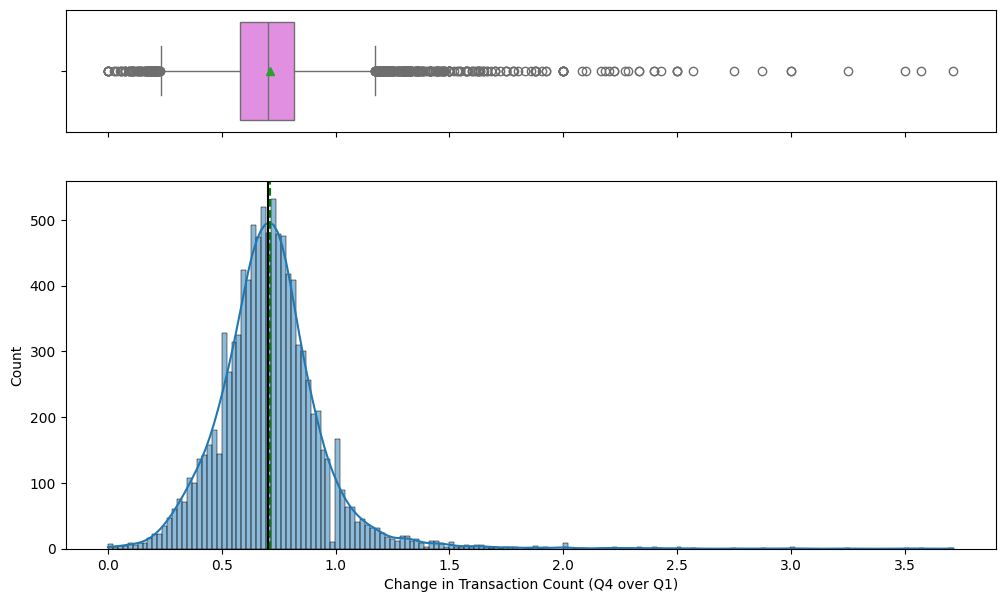

In [ ]:
# histogram_boxplot for change in transaction count (Q4 over Q1)
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)
plt.xlabel("Change in Transaction Count (Q4 over Q1)");

* This appears to be a very slightly right skewed distribution with a lot of outliers on both ends.
* Similar to the total amount change, most of the data falls between ~0.6 and ~0.8 change.

Avg_Utilization_Ratio

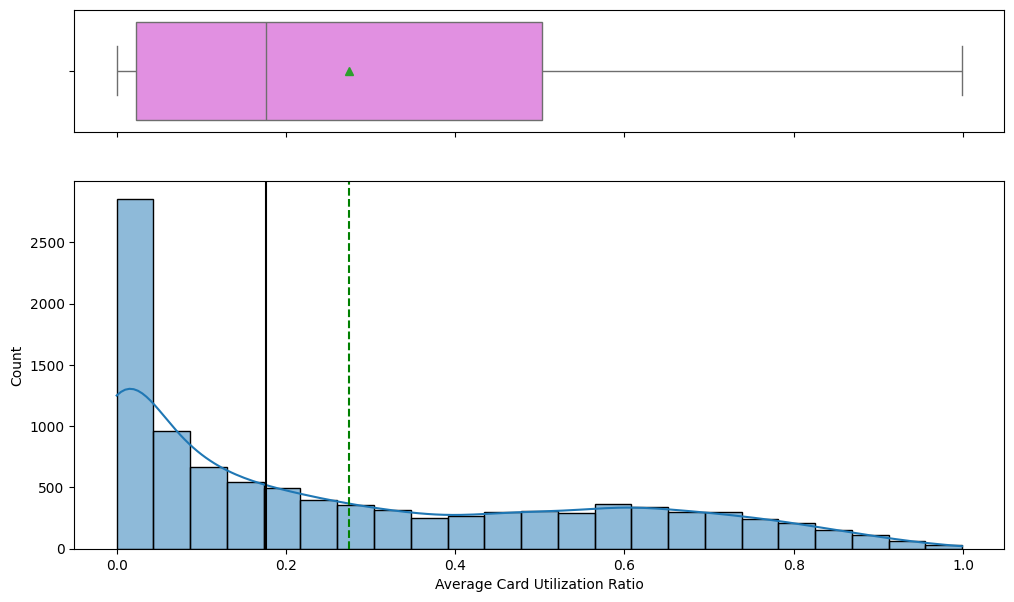

In [ ]:
# histogram_boxplot for average card utilization ratio
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)
plt.xlabel("Average Card Utilization Ratio");

* Distribution of avg_utilization ratio is right skewed with no outliers.
* We can see that many customers do not use any of their available credit, and some use all of their available credit.

#### Depedent_count

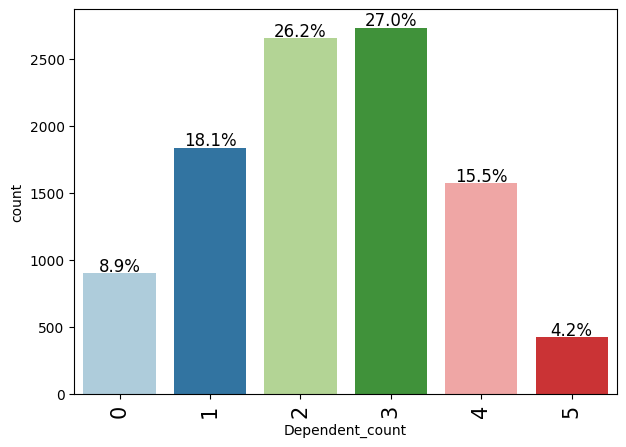

In [ ]:
# labeled_barplot for dependent count
labeled_barplot(data, "Dependent_count", perc=True)

* 27.0% of customers have 3 depedents, followed by 26.2% who have 2 dependents.

Total_Relationship_Count

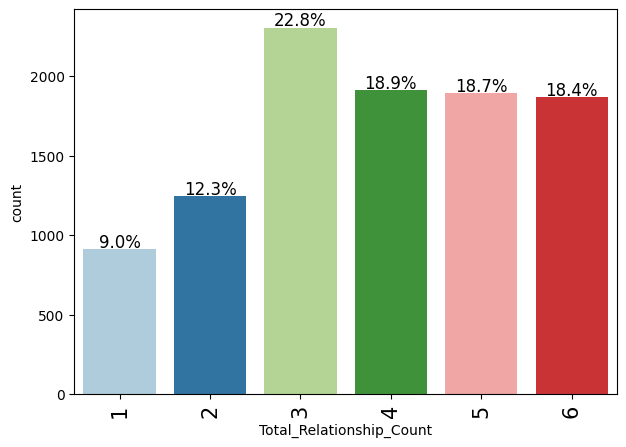

In [ ]:
# labeled_barplot for total number of products held by the customer
labeled_barplot(data, "Total_Relationship_Count", perc=True)

* 22.8% of customers hold 3 products from the bank.
* 91% of customers have at least 2 products.

#### Months_Inactive_12_mon

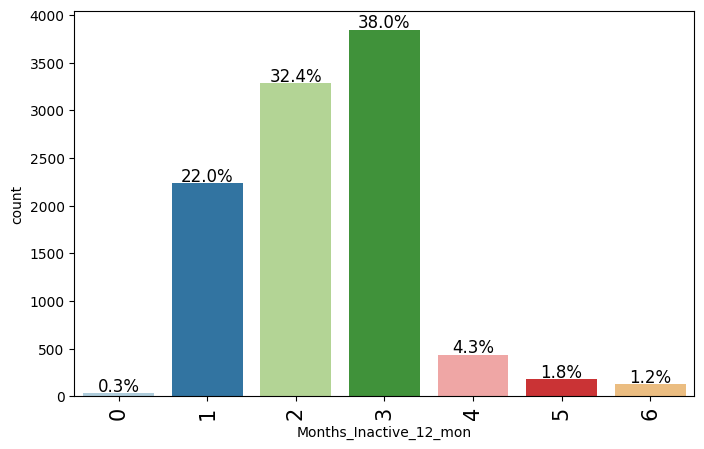

In [ ]:
# labeled_barplot for number of months inactive in the last 12 months
labeled_barplot(data, "Months_Inactive_12_mon", perc=True)

* 38% of customers have been inactive for 3 months out of the last 12 months, and 32.4% have been inactive for 2 months out of the last 12.
* Only .3% of customers have been inactive for 0 months.

Contacts_Count_12_mon

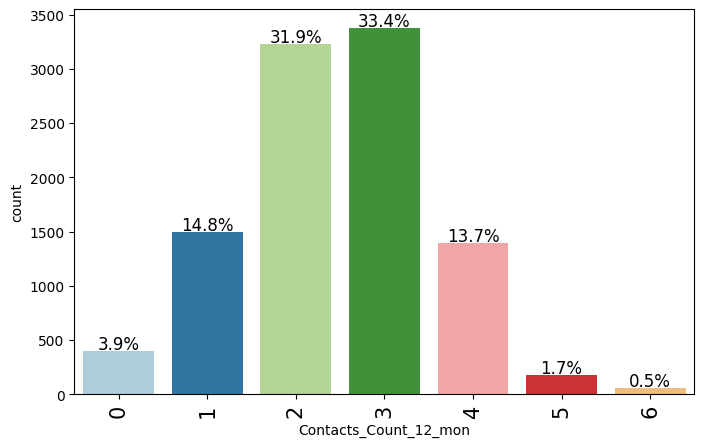

In [ ]:
# labeled_barplot for number of contacts in the last 12 months
labeled_barplot(data, "Contacts_Count_12_mon", perc=True)

* 33.4% of customers have had 3 contacts in the last 12 months.

#### Gender

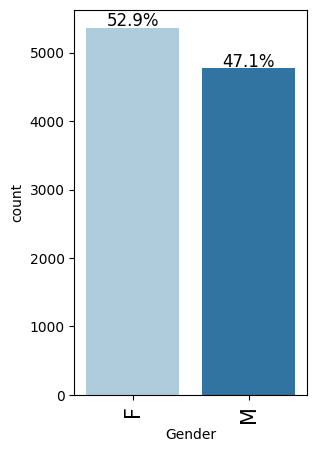

In [ ]:
# labeled_barplot for gender of customer
labeled_barplot(data, "Gender", perc=True)

* 52.9% of customers are female.
* 47.1% of customers are male.

####**Question 2: What is the distribution of the level of education of customers?**

Education_Level

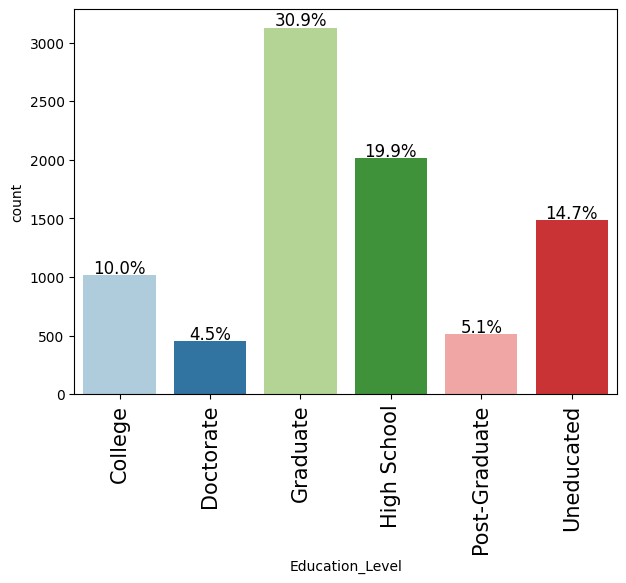

In [ ]:
# labeled_barplot for Education Level of customers
labeled_barplot(data, "Education_Level", perc=True)

* Most customers are graduates (30.9%), followed by high-school education (19.9%).
* 10% of customers are still college students
* 14.7% are Uneducated
* 5.1% have a Post-Graduate education
* Only 4.5% of customers have their Doctrate

* Understanding the educational background of customers may inform us which educational demographics are most likely to continue partnerships with the bank.

#### Marital_Status

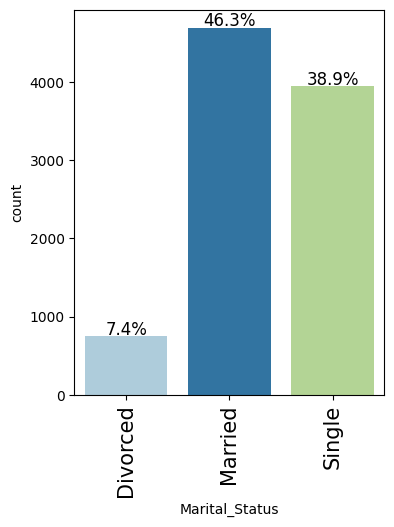

In [ ]:
# labeled_barplot for marital status of customers
labeled_barplot(data, "Marital_Status", perc=True)

* The majority of customers are married (46.3%), followed by customers who are single (38.9%).
* We can see that only 7.4% of customers are divorced.
* We will look into this further to see if marital status influenced financial decisions.

####**Question 3: What is the distribution of the income level of customers?s**

Income_Category

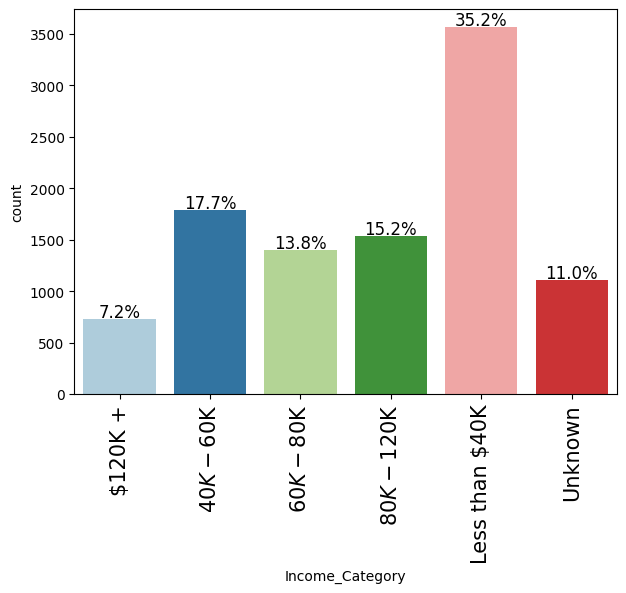

In [ ]:
# labeled_barplot for income category
labeled_barplot(data, "Income_Category", perc=True)

* The largest income category for customers is "Less than 40K", followed by "40K-60K".
* 11% of the customer's incomes are listed as "Unknown" which indicates that there is some missing data here.
* We can look further into income distributions to see whether that has an impact on whether customers use credit card services.

#### Card_Category

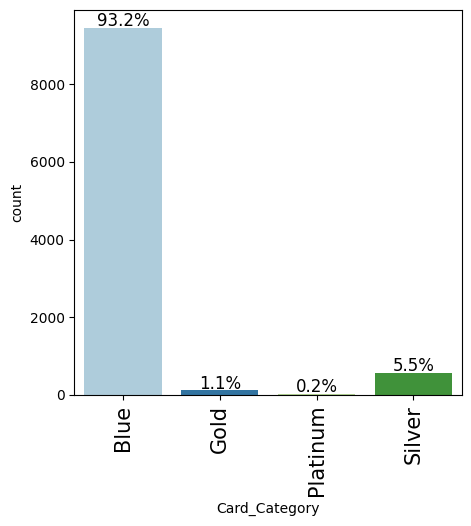

In [ ]:
# labeled_barplot for Card Category
labeled_barplot(data, "Card_Category", perc=True)

* The vast majority of customers have the "Blue" card category (93.2%), while the other categories (Silver, Gold, Platinum) make up much smaller proportions.
* This suggests that most customers have standard card offerings, with fewer opting for premium card options.

#### Attrition_Flag

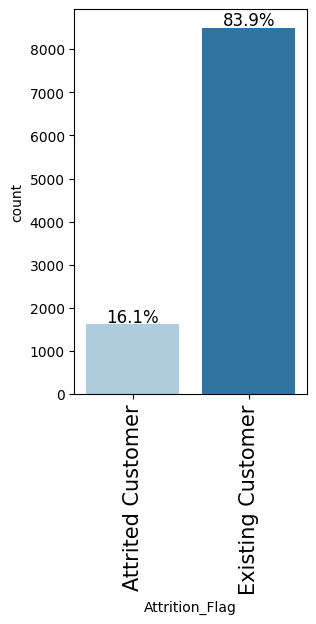

In [ ]:
# labeled_barplot for attrition flag
labeled_barplot(data, "Attrition_Flag", perc=True)

* The majority of customers (83.9%) are existing customers.
* About 16.1% of customers are attrited, indicating that there are a decent amount of customers that have closed their credit card accounts. We should analyze this further to see which variables impact this decision.

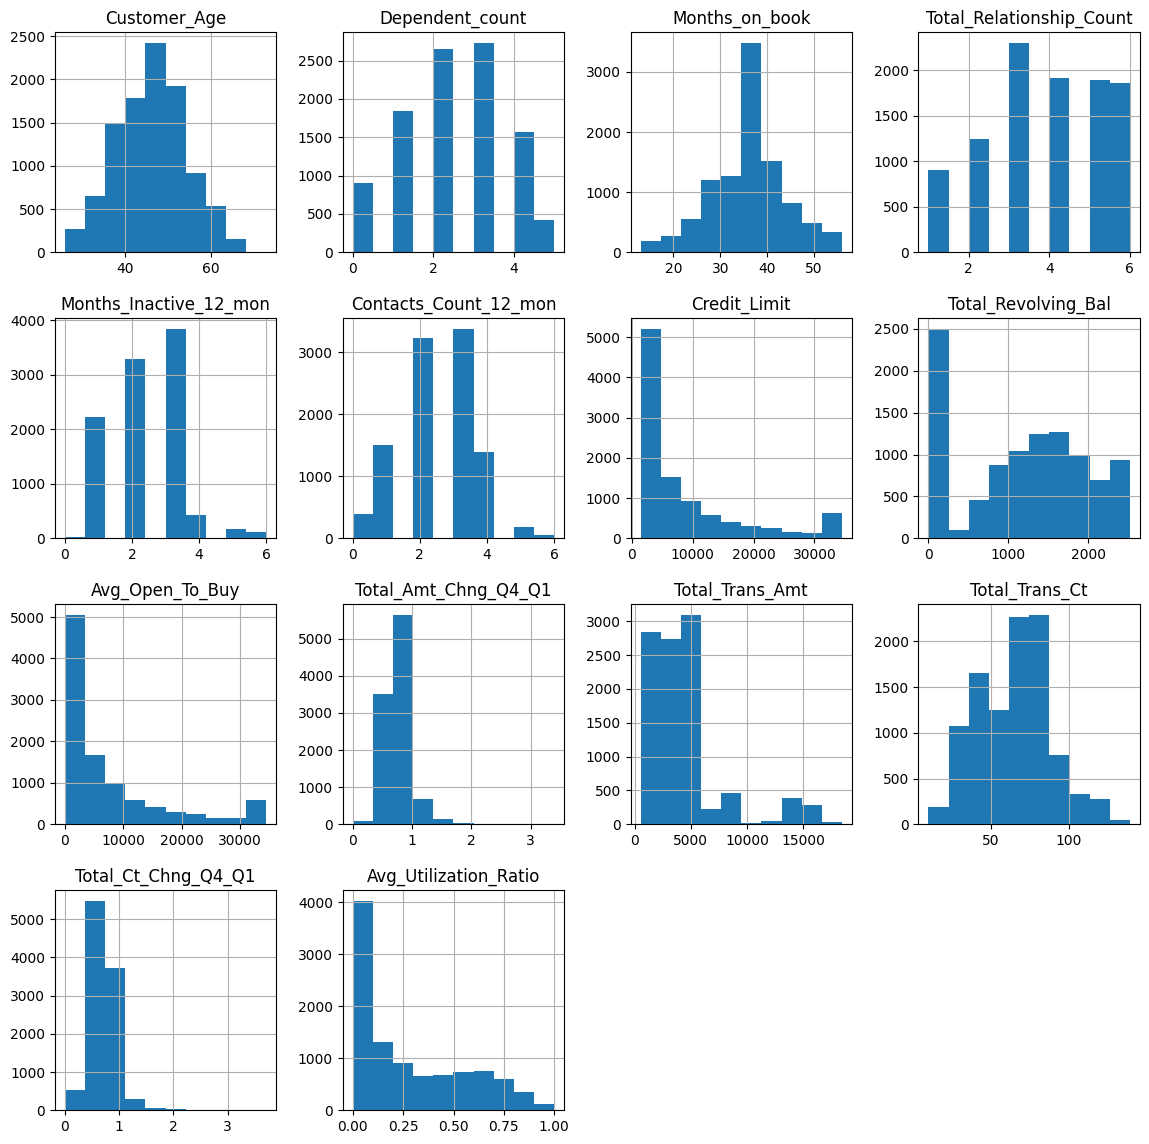

In [ ]:
# creating histograms for numerical values
data.hist(figsize=(14, 14))
plt.show()

## Bivariate Analysis

#### **Correlation Check**

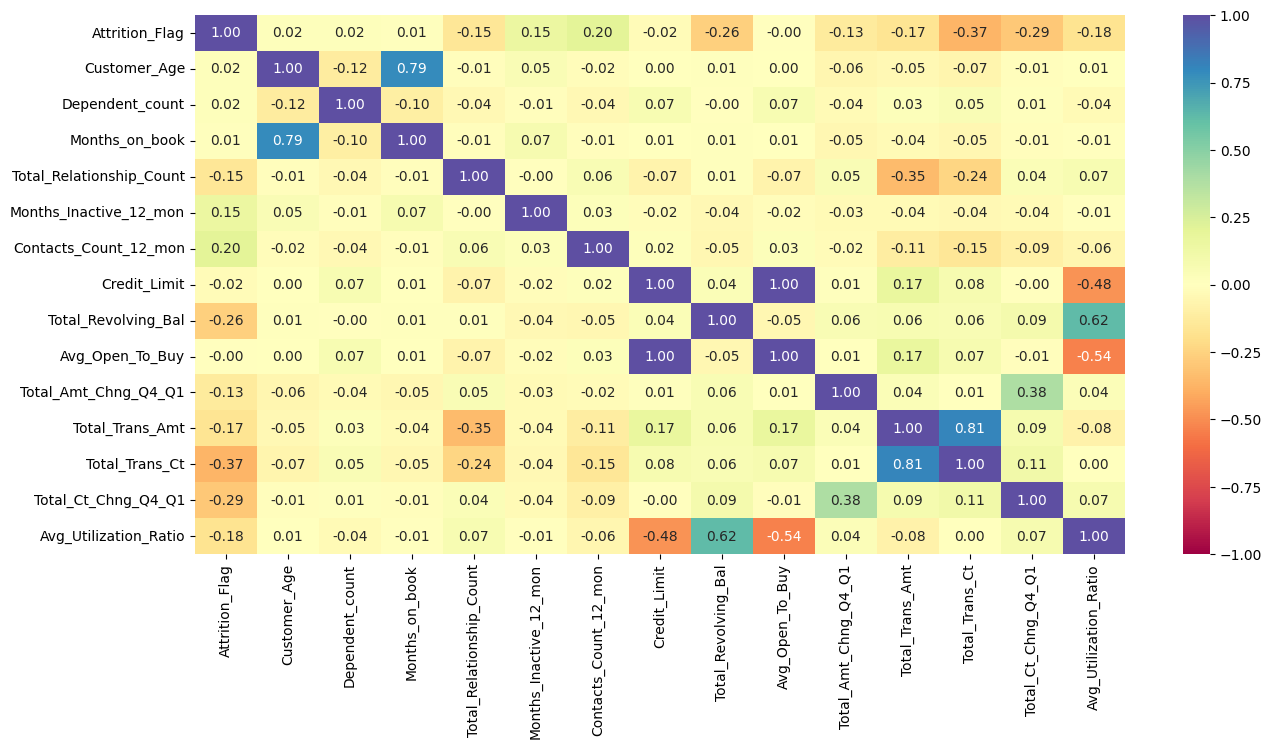

In [ ]:
# Creating a correlation map between numerical values

# selecting numerical values
numeric_df = df.select_dtypes(include=['number'])

# plotting heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

####**Question 6: What are the attributes that have a strong correlation with each other?**

*Note: Remainder of answer further down in analysis*

*  **There appears to be strong correlations between:**
  * Total_Trans_Amt and Total_Trans_Ct (0.81).
    * This indicates that customers who conduct more transactions tend to spend more.
  * Months_on_book and Customer_Age (0.79).
    * This indicates that older customers tend to have longer relationships with the bank.

* **There appears to be moderate/weak correlations between:**
  * Total_Revolving_Bal and Avg_Utilization_Ratio (0.62).
    * This indicates that customers with higher revolving balances tend to have higher average utilization ratios, which means they are utilizing a larger portion of their available credit.
  * Avg_Open_To_Buy and Avg_Utilization Ratio (-0.54).
    * This indicates that customers with higher open-to-buy credit lines tend to have lower average utilization ratios.
  * Credit_Limit and Avg_Utilization_Ratio (-0.48).
    * This could indicate that customers with higher credit limits tend to have lower average utilization ratios.
  * Total_Trans_Ct and Attrition_Flag (-0.37)
    * This could indicate that there is a slight tendency for customers who conduct more transactions to have a lower likelihood of attrition.
  * Total_Trans_Amt and Total_Relationship_Ct (-0.35).
    * This could indicate that there is a slight tendency for customers who conduct higher transactions to have fewer products with the bank.

#### Attrition_Flag vs Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


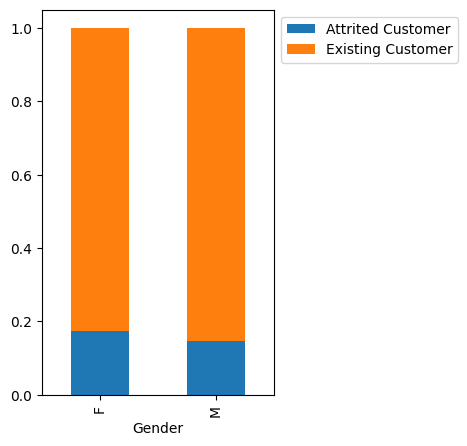

In [ ]:
# Distribution plot for Attrition Flag vs Gender
stacked_barplot(data, "Gender", "Attrition_Flag")

#### **Observations:**

* Among female customers, approximately 17% have closed their accounts, approximately 83% are still existing customers.
* Among male customers approximately 15% have closed their accounts, approximately 85% are still existing customers.

#### **Conclusions:**
* The attrition rate for female customers is slightly higher than male customers, but the difference is likely not substantial.

Attrition_Flag vs Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


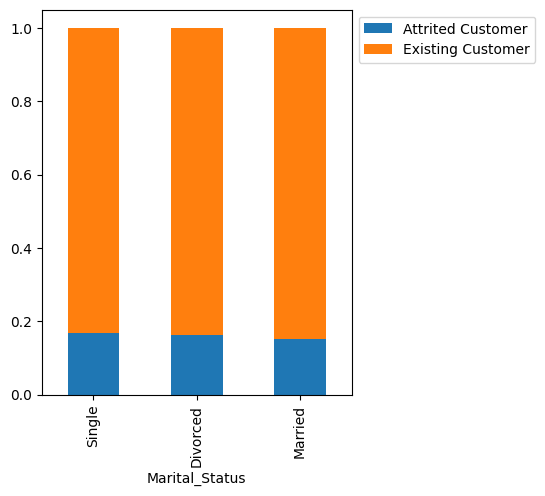

In [ ]:
# Distribution plot for Attrition Flag vs Marital Status
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

#### **Observations:**

* Married customers: ~15% have closed their accounts, while ~85% are still existing customers.
* Single customers: ~17% have closed their accounts, while ~83% are still existing customers.
* Divorced customers: ~16% have closed their accounts, ~84% are still existing customers.

#### **Conclusions:**
* The attrition rate for single customers is slightly higher when compared to married customers and divorced customers. However, marital status not appear to have a substantial impact on the attrition rate.

Attrition_Flag vs Education_Level

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


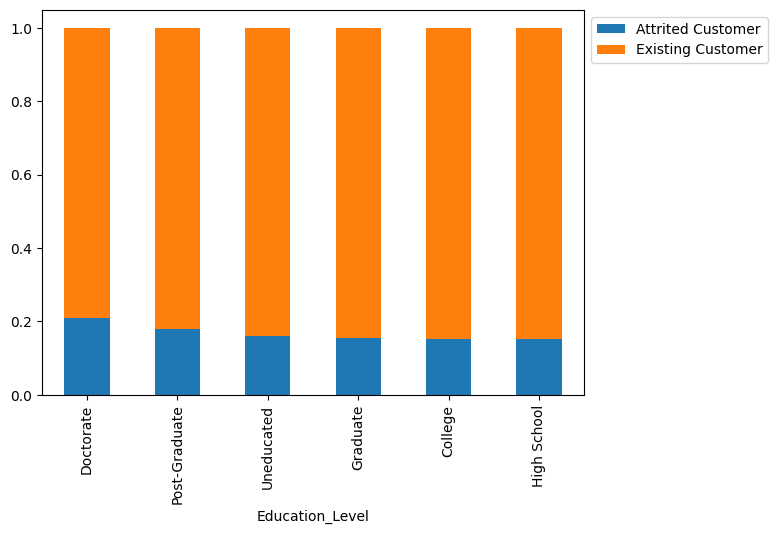

In [ ]:
# Distribution plot for Attrition Flag vs Education Level
stacked_barplot(data, "Education_Level", "Attrition_Flag")

#### **Observations:**
* The attrition rates vary slightly across different education levels, with the highest attrition rate observed among customers with a doctorate education level (21%) and the lowest among customers with a high school education level (15%).

#### **Conclusions:**
* The differences in attrition rates between education levels do not appear to be substantial. Additional analysis on factors may be needed to understand the underlying reasons for attrition and whether education level plays a significant role.


Attrition_Flag vs Income_Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


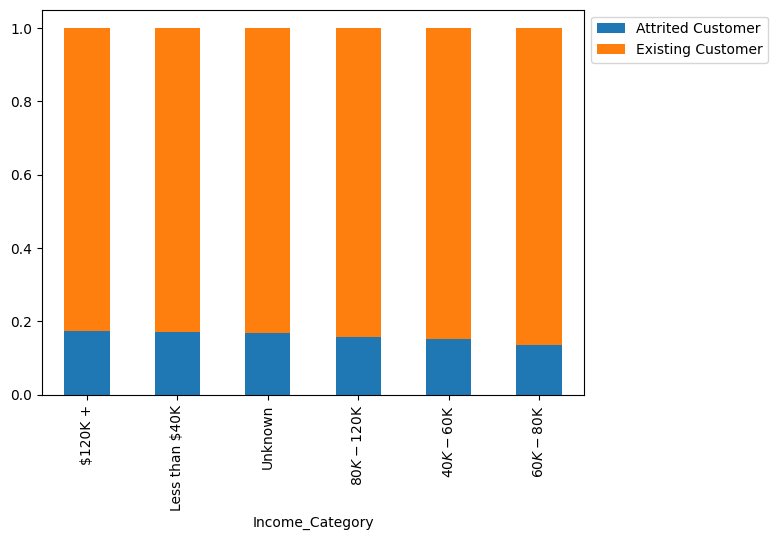

In [ ]:
# Distribution plot for Attrition Flag vs Income Category
stacked_barplot(data, "Income_Category", "Attrition_Flag")

#### **Observations:**

* The highest attrition rate is observed among customers with an income of Less than 40K (17%) and an Unknown income category (17%).
* Customers with incomes between 60K and 80K have the lowest attrition rate at approximately 13%.

#### **Conclusions:**
* There is a general trend of slightly higher attrition rates among lower income categories, but the differences in attrition rates between income categories are not substantial enough to conclude whether there is a relationship between the two.

Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


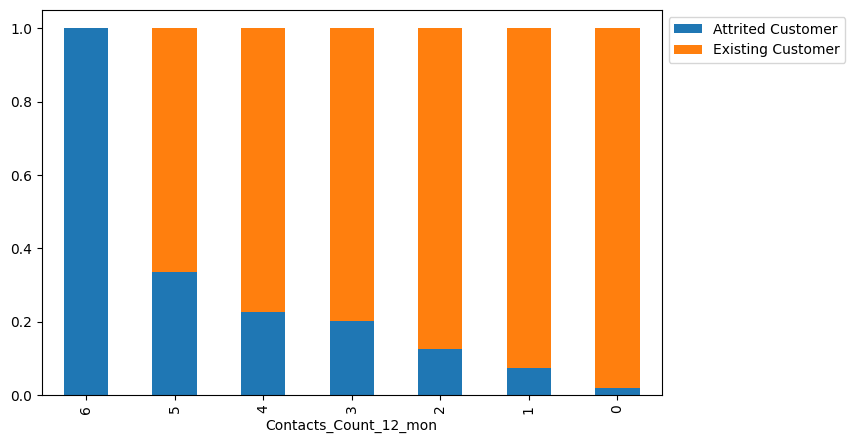

In [ ]:
# Distribution plot for Attrition Flag vs Number of Contacts in the Last 12 Months
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

#### **Observations:**
* We can see based on the barplot that customers who had fewer contacts tend to have lower attrition rates, while those with more contacts tend to have higher attrition rates.
* The highest attrition rate is observed among customers who had 5 contacts in the last 12 months (~ 34%), followed by those who had 3 contacts (~ 20%) and 4 contacts (~ 23%).
* The lowest attrition rate is observed among customers who had 1 contact (~7%).

#### **Conclusions:**
* There appears to be a relationship between the number of contacts made in the last 12 months and the likelihood of attrition, implying that customers with fewer contacts are less likely to attrite, while those with more contacts are more likely to attrite.

* *Note: We can see that the sample size/counts are lower with more contacts, so we should keep that in mind.*

#### Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


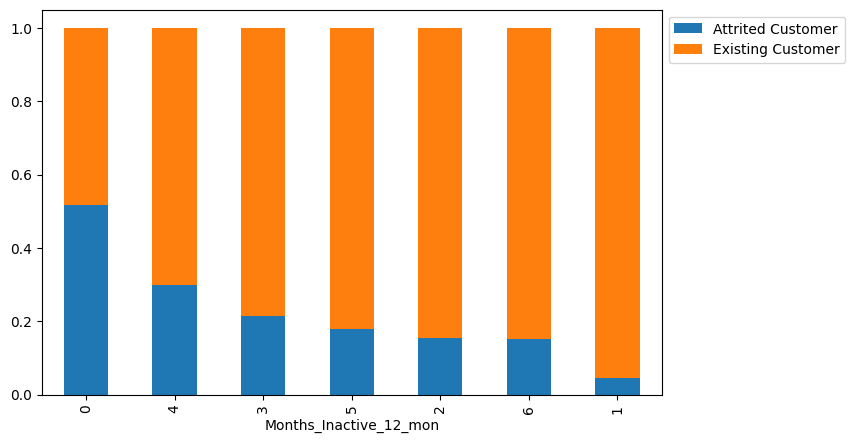

In [ ]:
# Distribution plot for Attrition Flag vs Number of Months Inactive in the last 12 Months
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

**Question 5: How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?**

#### **Observations:**
* Based on the barplot, we can see that customers who were inactive for more months tend to have higher attrition rates.
* The highest attrition rate is observed among customers who were inactive for 4 months in the last 12 months (29.8%), followed by those who were inactive for 3 months (21.5%).

* The lowest attrition rate is observed among customers who were only inactive for 1 month (4.5%).

#### **Conclusions:**
*  There appears to be relationship between the number of months inactive in the last 12 months and the likelihood of attrition. We can assume that customers who were inactive for more months are more likely to attrite compared to those who were inactive for fewer months.

#### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


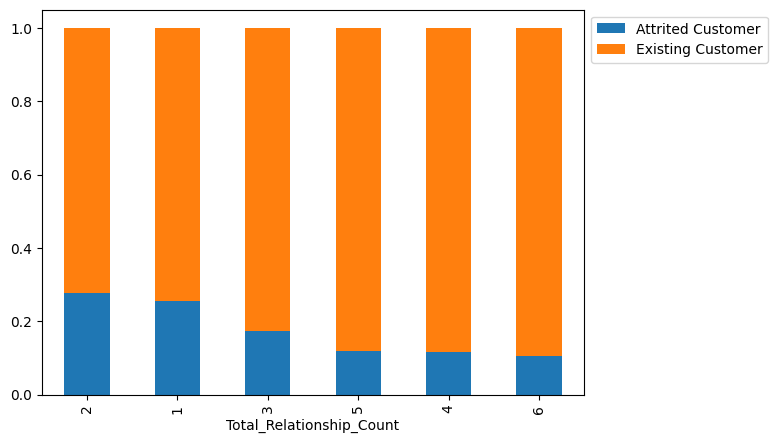

In [ ]:
# Distribution plot for Attrition Flag vs Total Relationship Count
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

#### **Observations:**
* Based on the barplot, we can see that customers with lower relationship counts tend to have higher attrition rates compared to those with higher relationship counts.
*  The highest attrition rate is observed among customers with a total relationship count of 2 (27.8%), followed by those with a total relationship count of 1 (25.6%).
* The lowest attrition rate is observed among customers with a total relationship count of 6 (10.5%).
#### **Conclusions:**
* There appears to be a relationship between the total relationship count and the likelihood of attrition. We can assume that customers with lower total relationship counts are more likely to attrite compared to those with higher total relationship counts.


#### Attrition_Flag vs Dependent_count

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


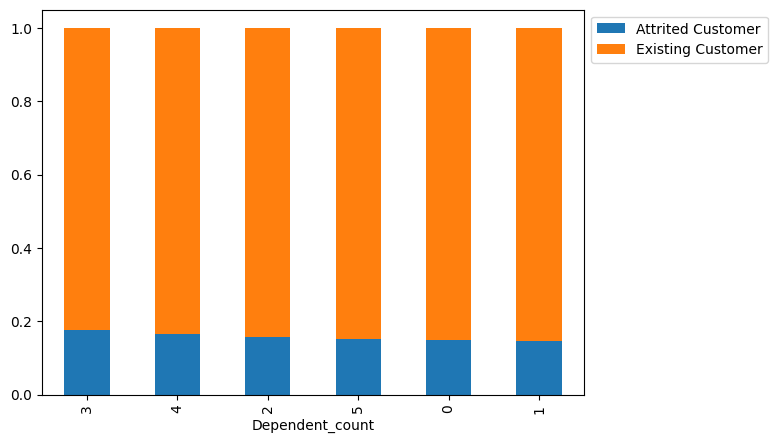

In [ ]:
# Distribution plot for Attrition Flag vs Dependent Count
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

#### **Observations:**
* Customers with 3 dependents have the highest attrition rate (17.6%), followed by those with 4 dependents (16.5%).
* Customers with fewer dependents (1, 0, 5) have relatively lower attrition rates, ranging from approximately 15% to 16%.
* The lowest attrition rate is observed among customers with 1 dependent (14.6%).
#### **Conclusions:**

* There appears to be some variation in attrition rates based on the number of dependents.
* Customers with 3 dependents have the highest attrition rate, while those with fewer dependents tend to have slightly lower attrition rates. We should look into this further to see whether this has a significant impact.

#### Income_Category vs Education_Level

Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Income_Category                                                             
All                 1013        451      3128         2013            516   
Less than $40K       345        158      1139          671            170   
$40K - $60K          183         70       553          355            111   
Unknown              108         70       332          225             47   
$60K - $80K          132         59       422          307             77   
$80K - $120K         175         57       478          308             81   
$120K +               70         37       204          147             30   

Education_Level  Uneducated   All  
Income_Category                    
All                    1487  8608  
Less than $40K          522  3005  
$40K - $60K             249  1521  
Unknown                 185   967  
$60K - $80K             195  1192  
$80K - $120K            217  1316  
$120K +           

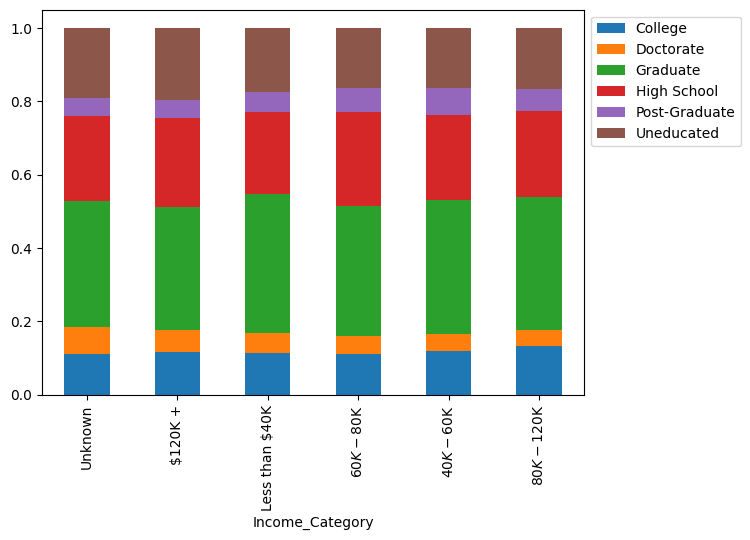

In [ ]:
# Distribution plot for Income Category vs Education Level
stacked_barplot(data, "Income_Category", "Education_Level")

#### **Observations:**
* The majority of customers across all income categories have a Graduate education level, followed by High School and Uneducated.
* Customers with income less than 40K are more likely to have a High School education level, while those with higher incomes ($80K and above)
* Doctorate education level is less common across all income categories compared to other education levels.
#### **Conclusions:**
* The distribution of education levels varies across income categories, with higher income categories generally having a higher proportion of customers with Graduate or Post-Graduate education levels.
* It seems there may be some association between Education Level and Income Category, but further analysis would be necessary to confirm the strength of the relationship.



#### Total_Revolving_Bal vs Attrition_Flag

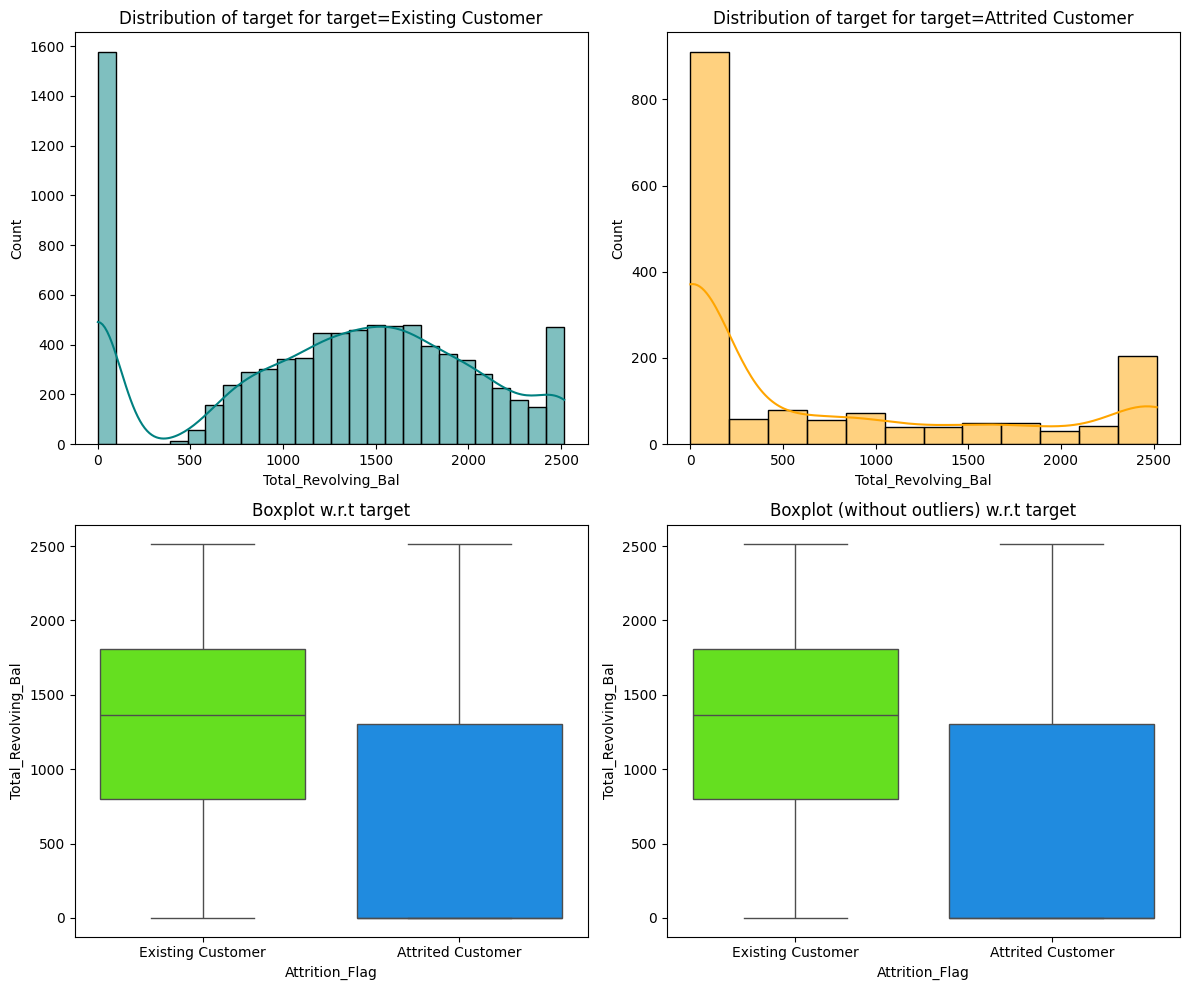

In [ ]:
# Distribution plot for Attrition Flag vs Total Revolving Balance
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

#### **Observations:**
* We can see that a large number of customers have a total revolving balance of 0.
* It appears that customers that attrited have a lower total revolving balance.
#### **Conclusions:**
* Customers with lower total revolving balances appear to be more likely to attrite. This could be due to external factors such as financial stability or payment capacity. We should look into this further to see if there are outside factors contributing.



#### Attrition_Flag vs Credit_Limit

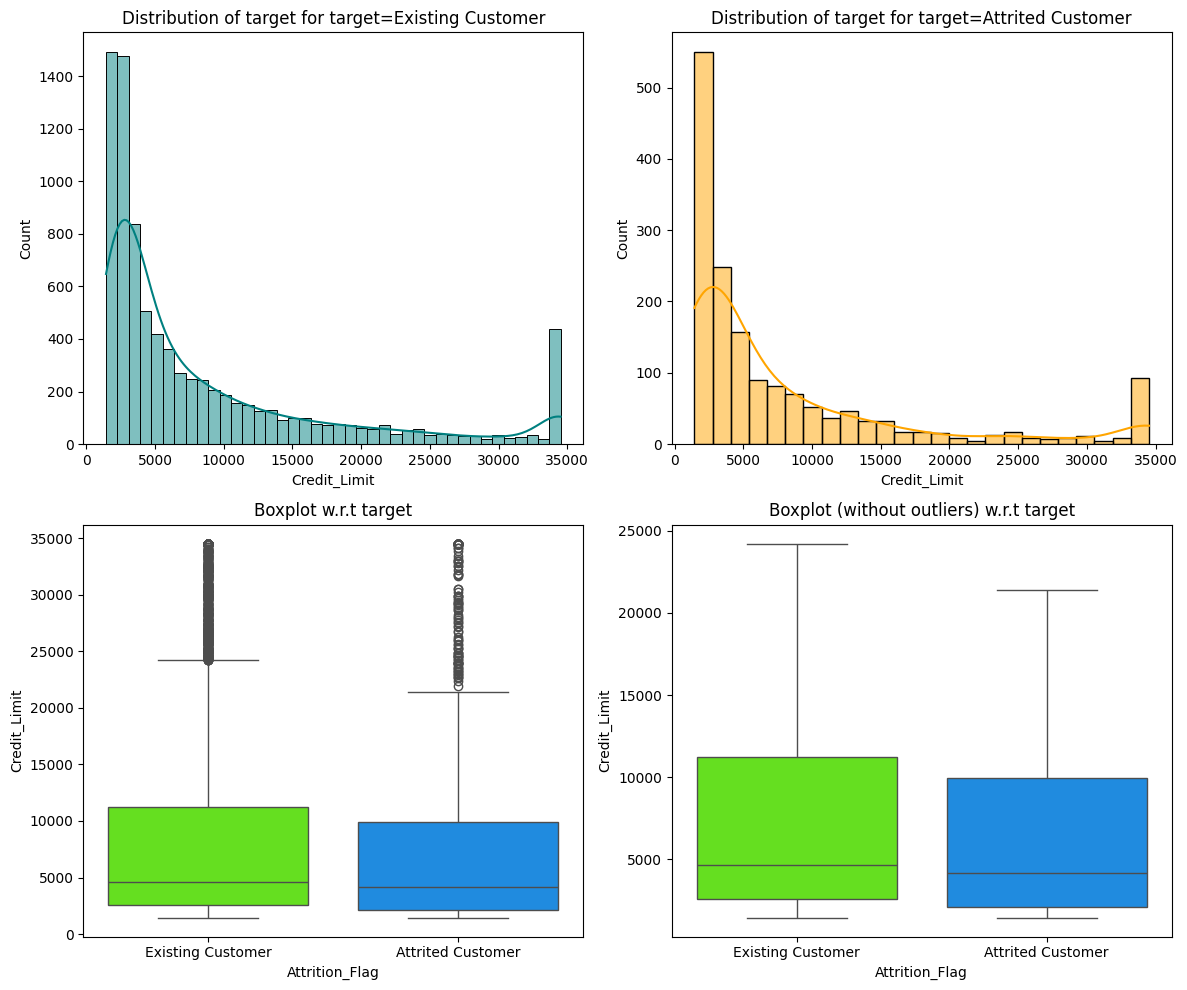

In [ ]:
# Distribution plot for Attrition Flag vs Credit Limit
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

#### **Conclusions:**
* Whether a customer decides to attrite or not does not appear to  vary based on their credit limit.


#### Attrition_Flag vs Customer_Age

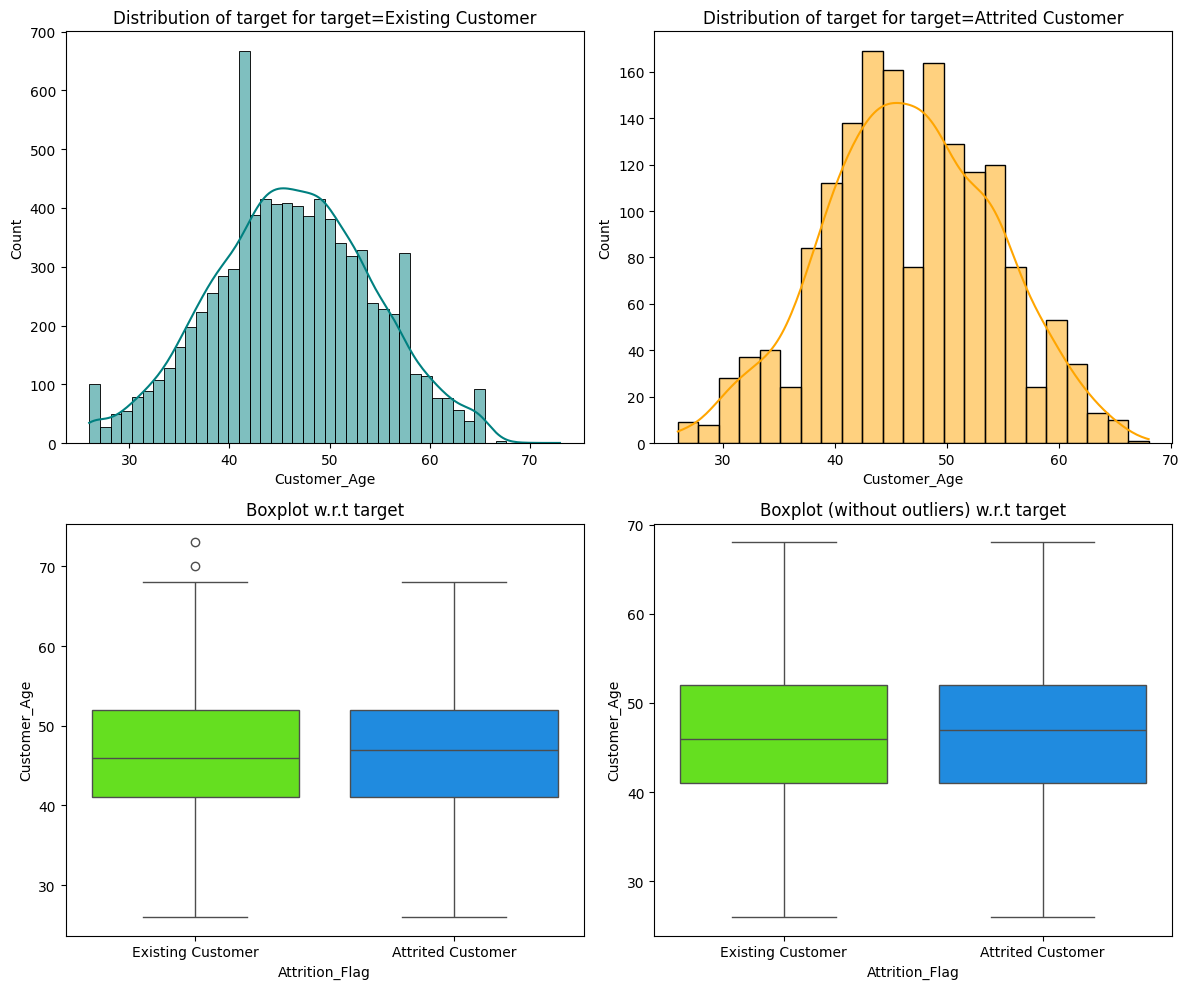

In [ ]:
# Distribution plot for Attrition Flag vs Customer Age
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")


#### **Conclusions:**
* It does not appear that whether a customer has attrited or not varies based on the customer's age.

Total_Trans_Ct vs Attrition_Flag

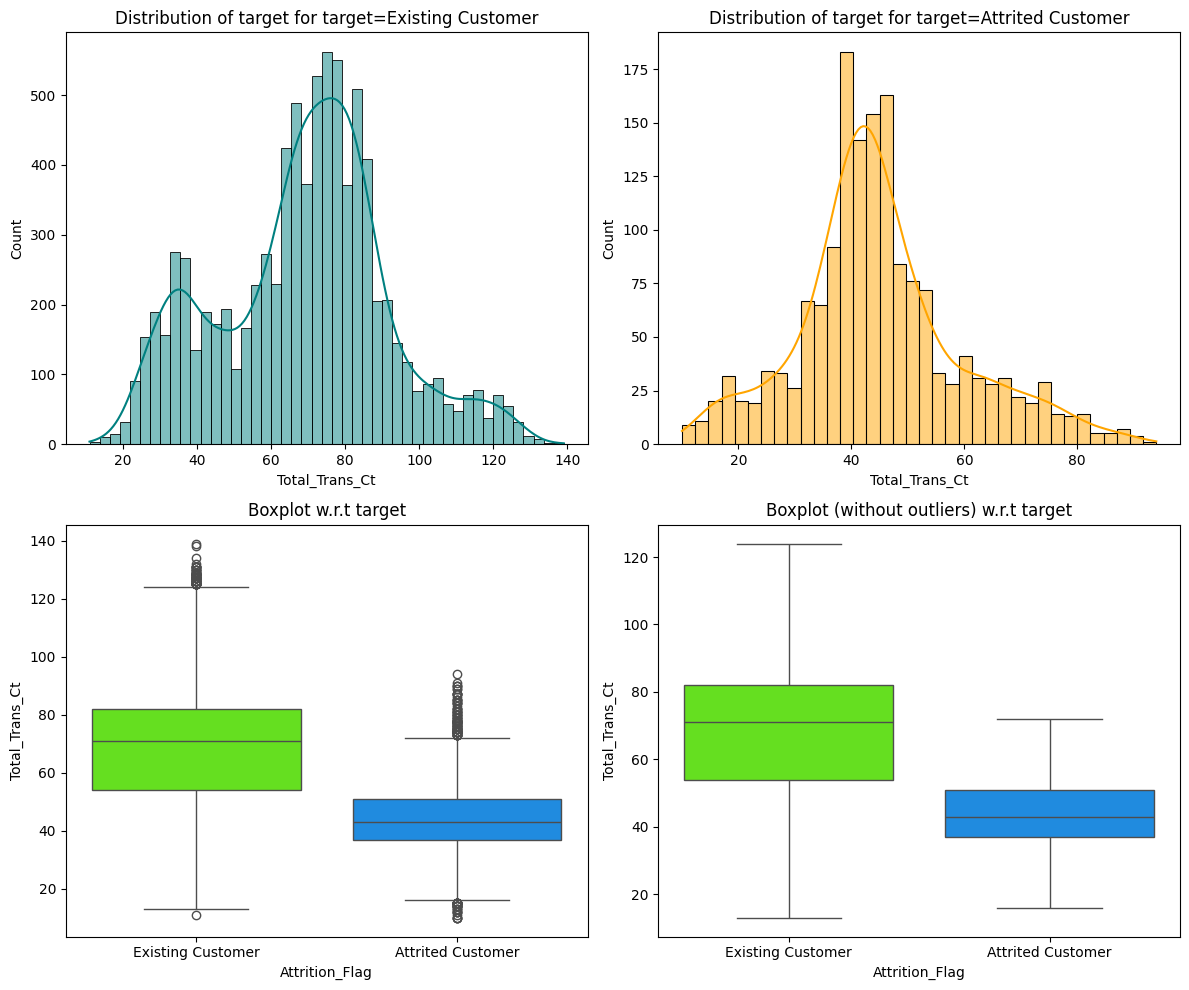

In [ ]:
# Distribution plot for Attrition Flag vs Total Transaction Count
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

#### **Observations:**
* We can see that customers who have attrited have lower transaction counts over the last 12 months compared to existing customers.

#### **Conclusions:**
* This makes sense, because a lower transaction count suggests that a customer is not actively using their credit card to make purchases. The decline of customer engagement would lead to a higher likelihood of attrition.
* There may be other factors such as a change in spending habits, percieved value of the credit card, financial constraints, etc. that we could look into as well to pinpoint why their transaction counts were low.

#### Total_Trans_Amt vs Attrition_Flag

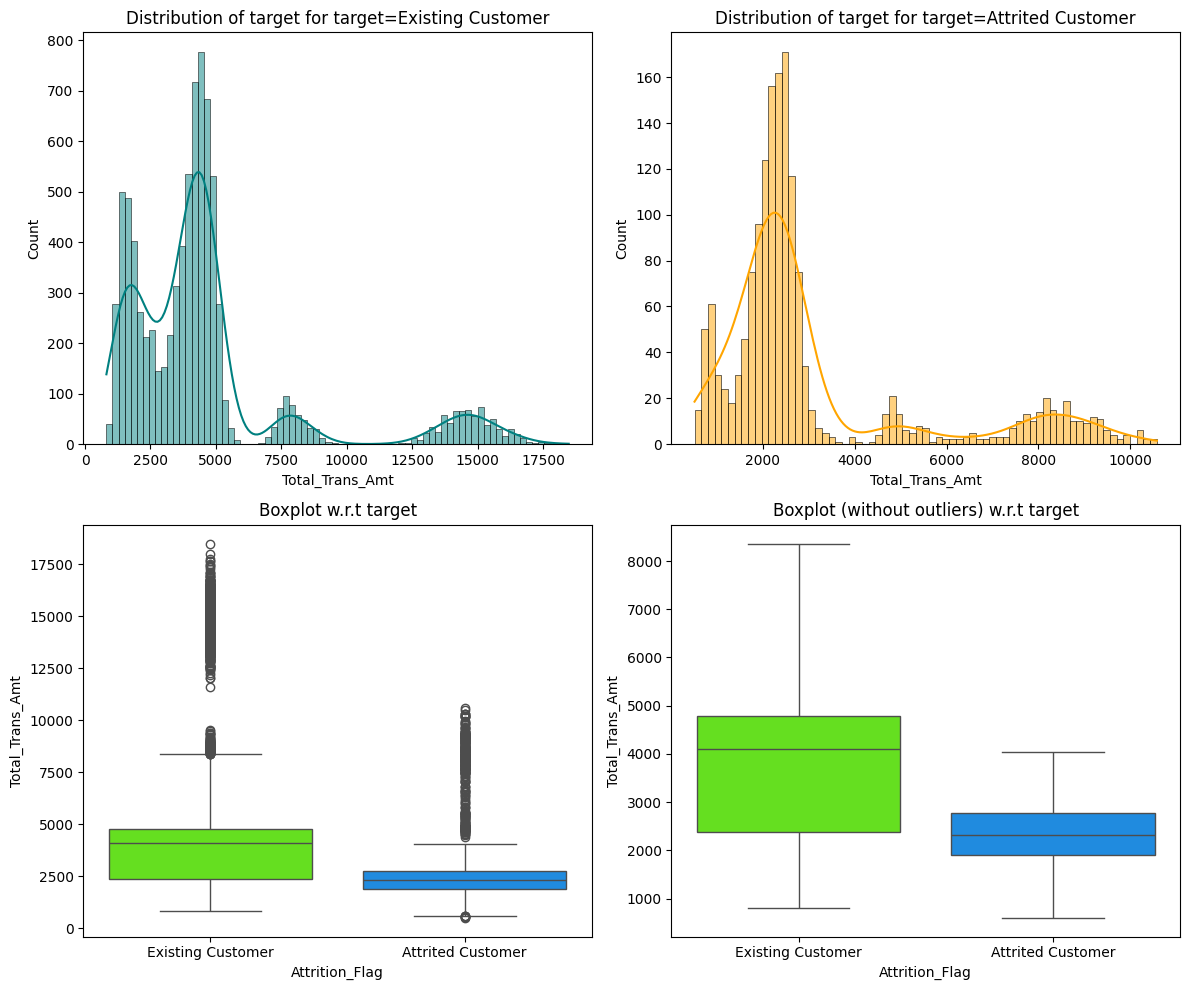

In [ ]:
# Distribution plot for Attrition Flag vs Total Transaction Amount
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

#### **Observations:**
* Customers who have attrited appear to have spent less on their credit cards over the last 12 months than existing customers.
* There are a lot of outliers on both ends, suggesting that there is a lot of variation in spending amounts between customers in both categories.

#### **Conclusions:**
* This makes sense, because a lower total transaction amounts suggest that a customer is not actively using their credit card to make purchases. The decline of credit card usage would lead to a higher likelihood of attrition.
* Although it is clear that attrited customers typically spend less on their credit card, we should keep in mind that existing customers may also have different credit limits, financial circumstances can change in a year, etc, so we should be careful about predicting likelood of attrition solely based on the customers total transaction amount.

#### Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

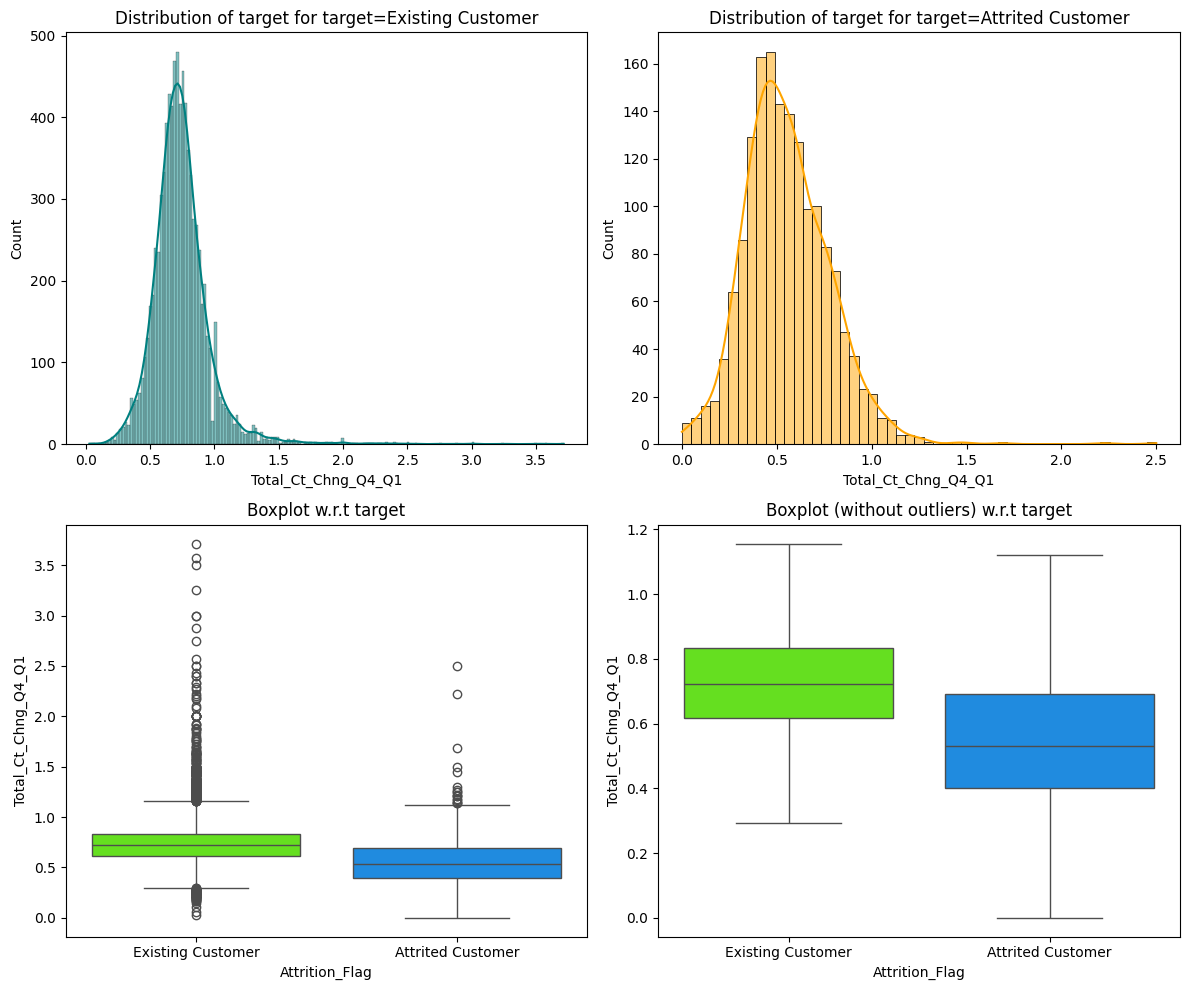

In [ ]:
# Distribution plot for Attrition Flag vs Total Count Change (Q4 over Q1)
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

**Question 4: How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?**

#### **Observations:**
* Existing customers appear to have a higher transaction count change between Q4 and Q1, while attrited customers appear to have a lower transaction count change.
* There are a lot of outliers in both groups. This may reflect that the spending habits are very different between customers. Customers in bothcategories may have more extreme transaction count changes due to unique circumstances/choices, such as significant events, financial distress, credit card incentives, etc.


#### **Conclusions:**
* Existing customers might have higher transaction count changes for several reasons such as engagement with offers, usage patterns, or customer loyalty programs.

* Customers who were in the process of attrition may already be less active with the accounts, which would lead to fewer overall transactions and a lower change in transaction count between Q4 and Q1.
* Customers with lower transaction count changes may be more likely to attrite, but the balance of 0 could simply reflect that a customer is paying off their credit on time, so the lower average change in transaction count is likely not substantial enough to determine whether we can predict likelihood of attrition based on the change.

#### Avg_Utilization_Ratio vs Attrition_Flag

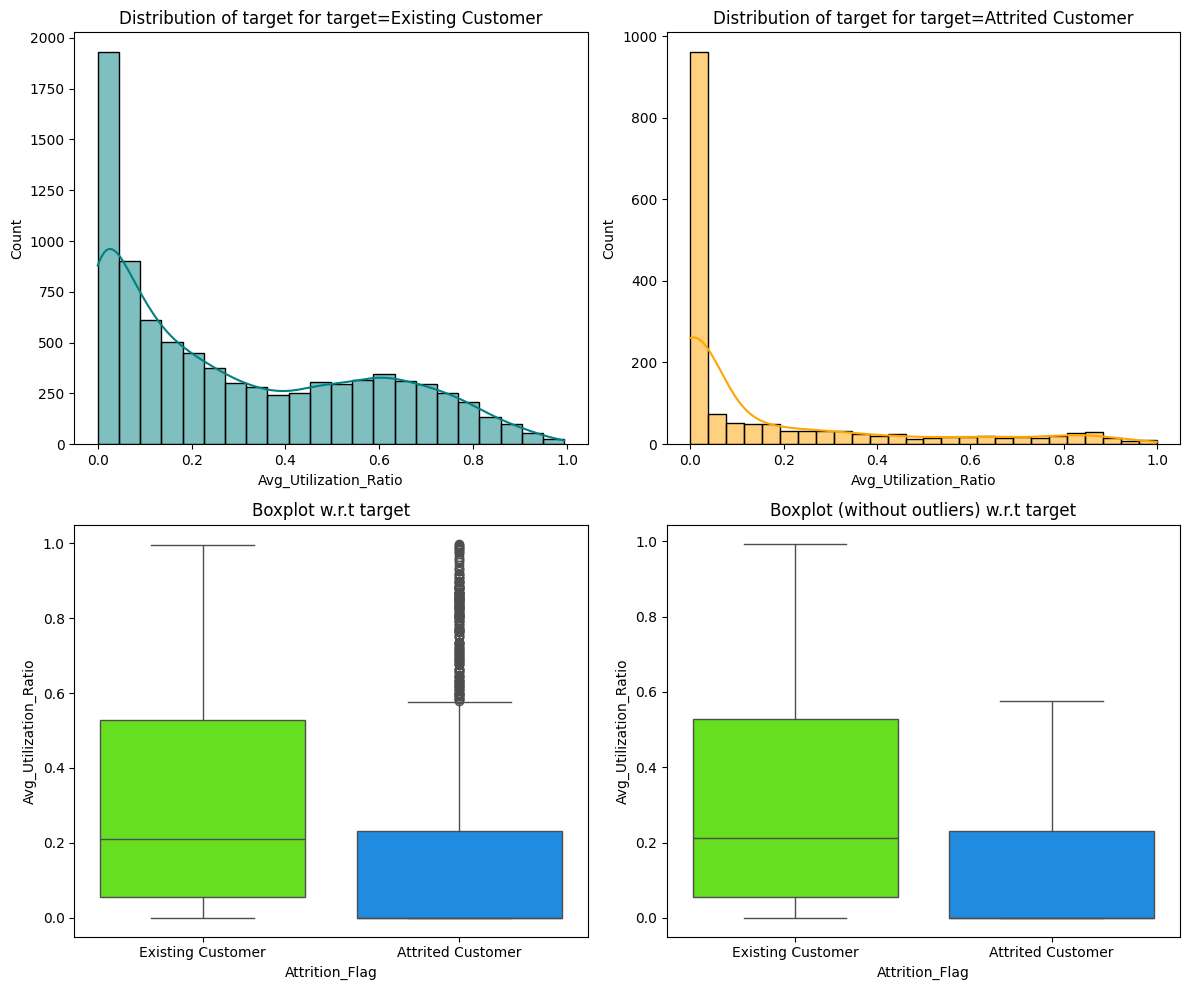

In [ ]:
# Distribution plot for Attrition Flag vs Average Utilization Ratio
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

#### **Observations:**
* The average utilization ratio repreents how much of the available credit the customer spent.
* We can see that the majority of customers, both attrited and existing, have an average utilization ratio of 0.
* We can see that existing customers tend to have a higher average utilizaton ratio than attrited customers.

#### **Conclusions:**
* The majority of customers having an average utiization ratio of 0 implies that many customers are not using their credit card at all, or that they are consistently paying off their balance in full each month.
  * For existing: this could mean they are paying off or not using.
  * For attrited: this could mean they are not spending on the card, and therefore do not have a balance to pay off.
* A higher average utilization ratio among existing customers is likely due to their ongoing usage and engagement with the credit card accounts.
* A lower average utilization ratio among attrited customers may be due to the fact that customers stopped using their cards or closed their accounts due to various reasons. Examples could include dissatisfaction with the bank's services, financial difficulties, or changing financial priorities. We should look into this more to see which outside factors contribute.

#### Attrition_Flag vs Months_on_book

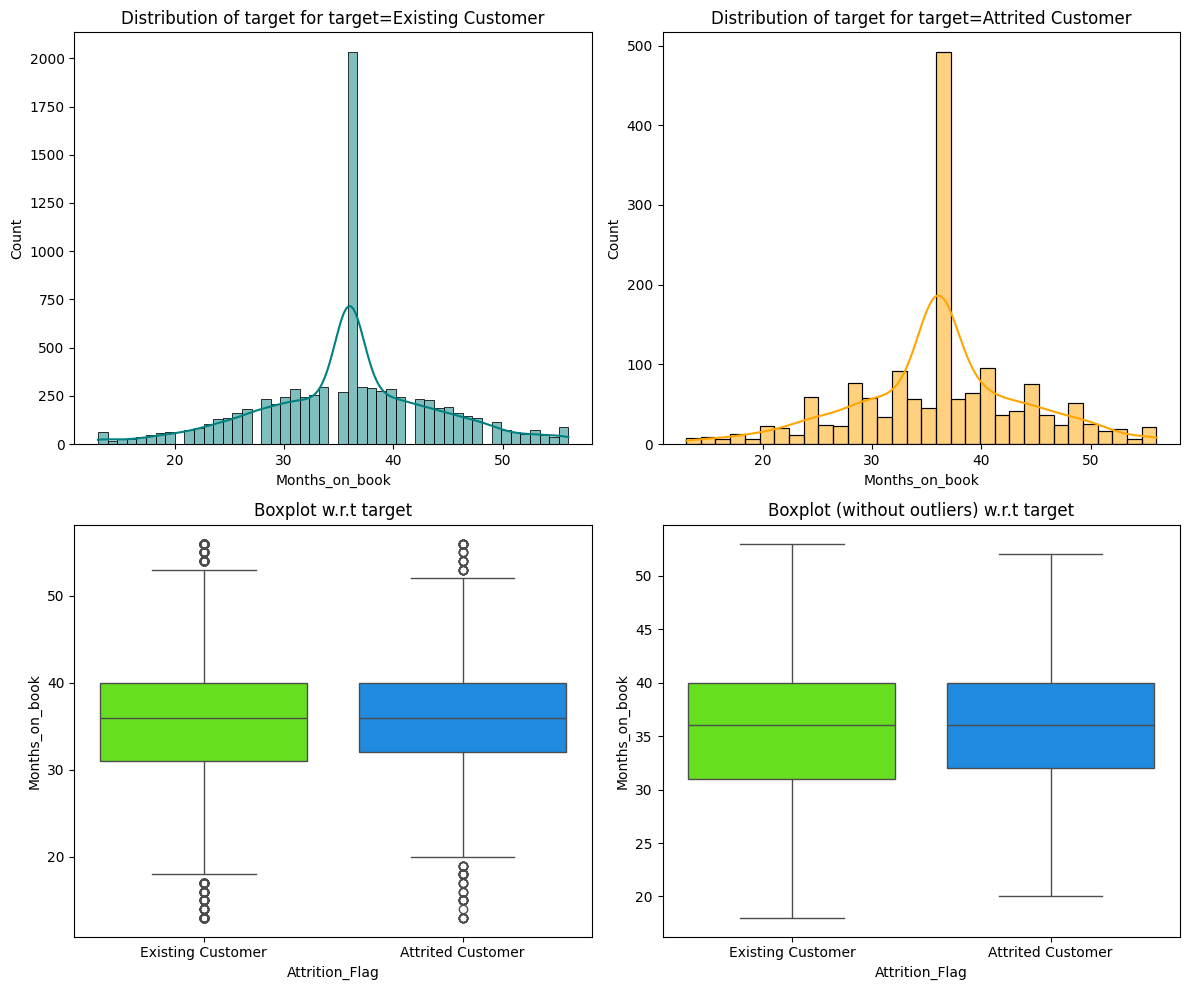

In [ ]:
# Distribution plot for Attrition Flag vs Number of Months on the Book
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")


#### **Conclusions:**
* It does not appear that the number of months a customer has had a relationship with the bank impacts attrition flag.

#### Attrition_Flag vs Total_Revolving_Bal

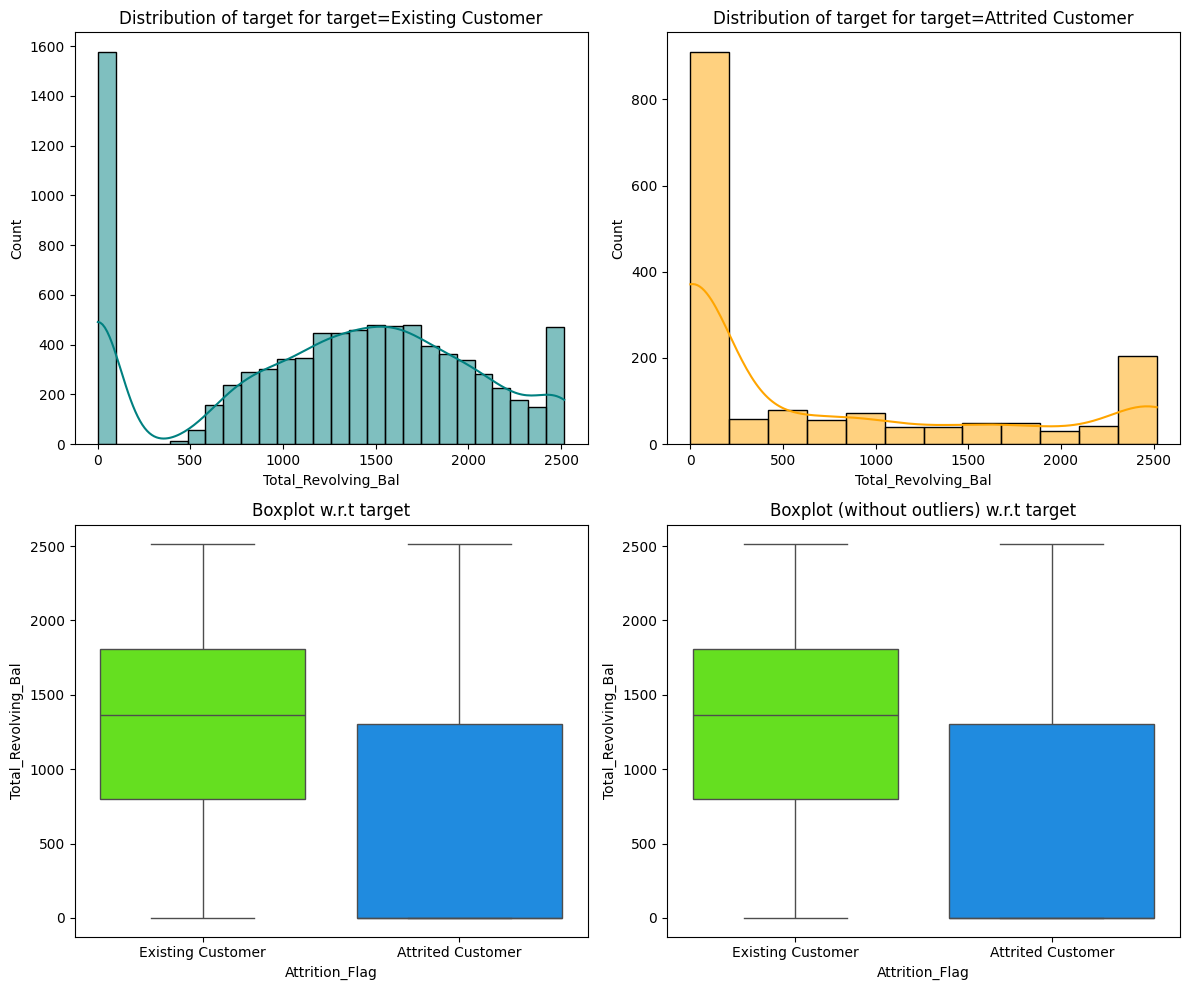

In [ ]:
# Distribution plot for Attrition Flag vs Total Revolving Balance on Credit Card
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

#### **Observations:**
* Existing customers appear to have a higher revolving balance that attrited customers.
* Many customers in both categories have a total revolving balance of 0.
#### **Conclusions:**
* Existing customers who actively use their credit cards for purchases and carry a balance from month to month are more likely to have a higher total revolving balance. They may utilize their credit cards for daily expenses, shopping, and other transactions, resulting in a larger outstanding balance.
* Attrited customers, who may be in the process of closing their accounts or have already done so, may have reduced their credit card usage, leading to lower total revolving balances.
* We should keep in mind that a total revolving balance of 0 could indicate a few things when looking at new data:
 1. The credit card holder has has either fully paid off their balance or has no outstanding debt to carry forward to the next billing cycle.
 2. The card holder may have closed the account and paid off the remaining balance,
 3. The card holder may be inactive, or not used the credit card during this billing cycle.  
  * *We should keep this in mind as to not always guarantee that a low revolving balance reflects they are more likely to attrite.*

#### Attrition_Flag vs Avg_Open_To_Buy

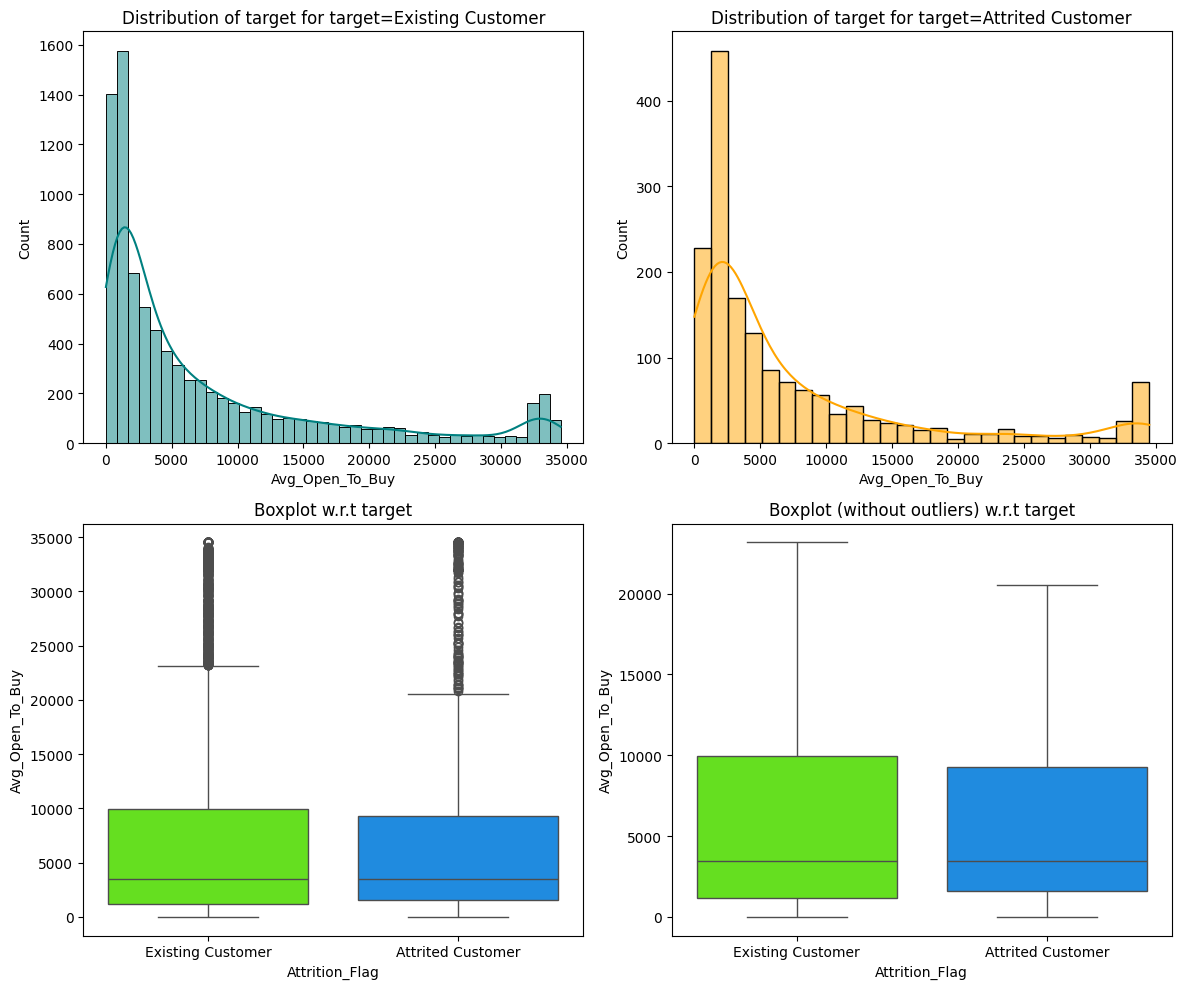

In [ ]:
# Distribution plot for Attrition Flag vs Customers Open to Buy Credit Line (avg of last 12 months)
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

#### **Observations:**
* The amount left on credit cards to use (open to buy) does not seem to have any impact on whether a customer attrites or not.
#### **Conclusions:**
* There could be other factors such as consistent spending patterns, similar credit limits, or other external factors that we should look into to determine what influences the amount remaining on their credit cards.

#### Correlation Map of Attrition Flag vs Numerical Variables

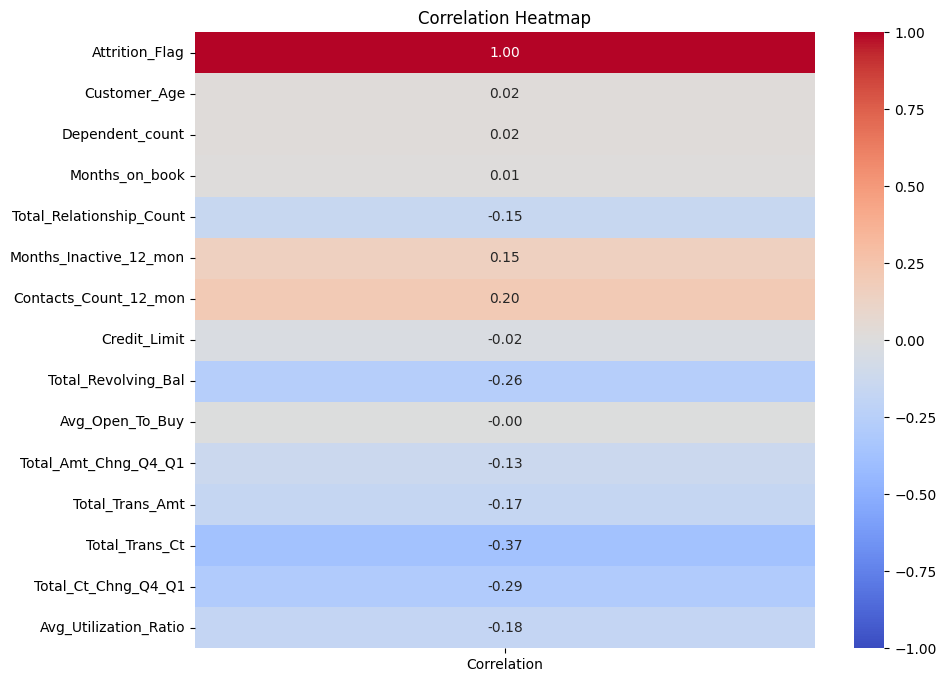

In [ ]:
#importing dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Compute correlation between the  target variable and each numerical variable
numerical_variables = df.select_dtypes(include=['float64', 'int64']).columns
target_variable = 'Attrition_Flag'  # target variable
point_biserial_corr = {}
for col in numerical_variables:
    point_biserial_corr[col] = stats.pointbiserialr(df[col], df[target_variable]).correlation

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame.from_dict(point_biserial_corr, orient='index', columns=['Correlation'])

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### Correlation for Relevant Numerical Variables

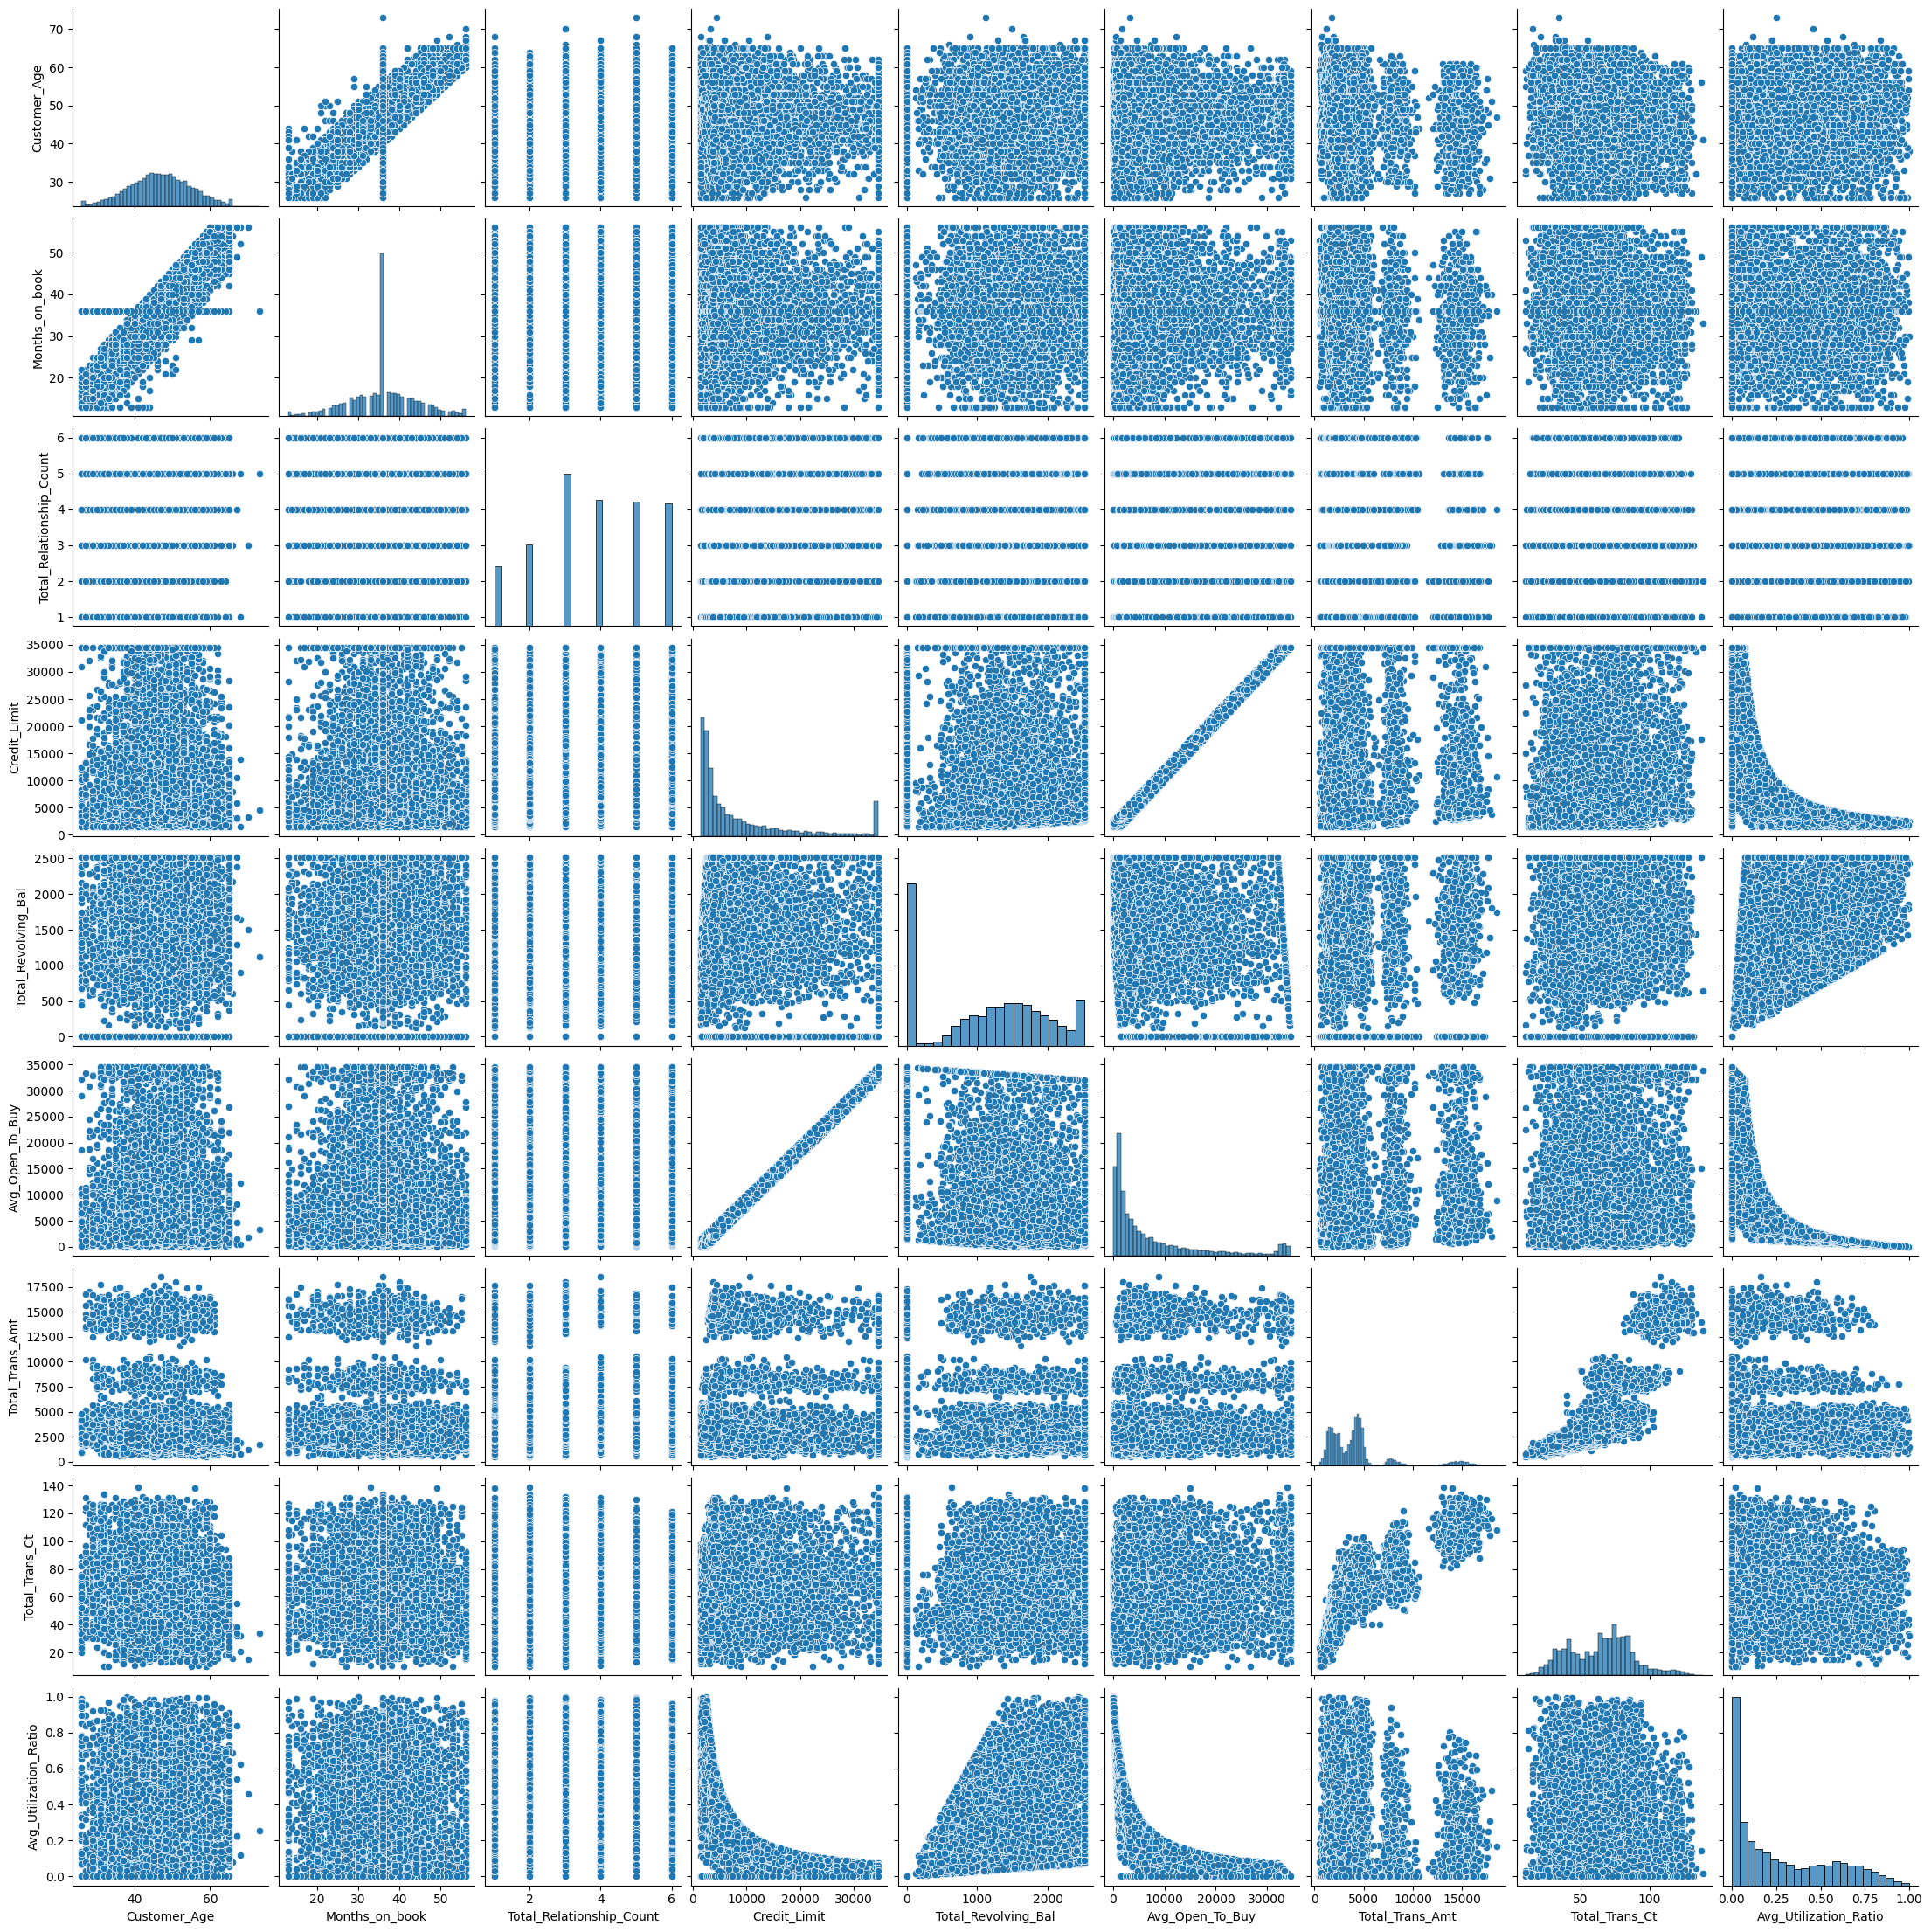

In [ ]:
# Creating pairplot for relevant numerical columns
# Selecting numerical columns
numerical_columns = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
                     'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Avg_Utilization_Ratio']

# Create the pairplot
sns.pairplot(df[numerical_columns])
plt.show()

#### **Question 6 Continued:**

#### **Observations:**
* We can see a linear positive relationship between Avg_Open_To_Buy and Credit_Limit
* We can see a negative relationship between Avg_Utilization_Ratio and Credit_Limit
* There seems to be a moderate positive relationship between Total_Transaction_Ct and Avg_Open_To_Buy
* We can see a negative relationship between Avg_Open_to_Buy and Avg_Utilization_Ratio.

#### **Conclusions:**

* The positive linear relationship between Avg_Open_To_Buy and Credit_Limit suggests that customers with higher credit limits tend to have more available credit for spending.

* The negative relationship between Avg_Utilization_Ratio and Credit_Limit indicates that customers with higher credit limits tend to utilize a smaller proportion of their available credit.

* The moderate positive relationship between Total_Transaction_Ct and Avg_Open_To_Buy suggests that customers with higher available credit tend to conduct more transactions. This highlights the correlation between credit availability and spending behavior, indicating that customers may be more likely to engage in transactions when they have sufficient credit available.

* The negative relationship between Avg_Open_to_Buy and Avg_Utilization_Ratio underscores the importance of effectively managing credit utilization. Customers with higher available credit relative to their utilization ratios may have a lower risk of overspending credit.

#### Gender vs Numerical Variables

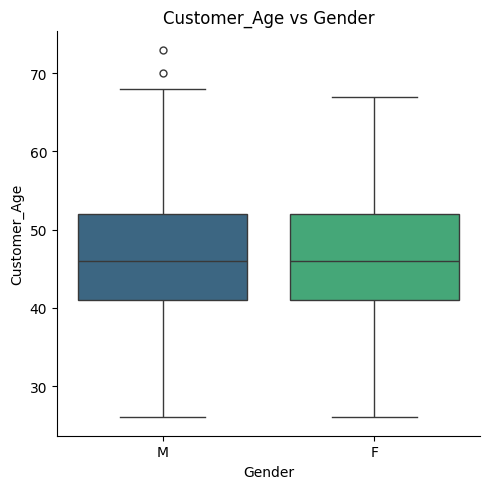

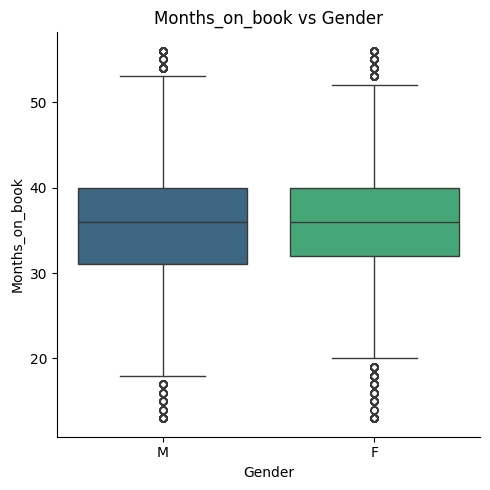

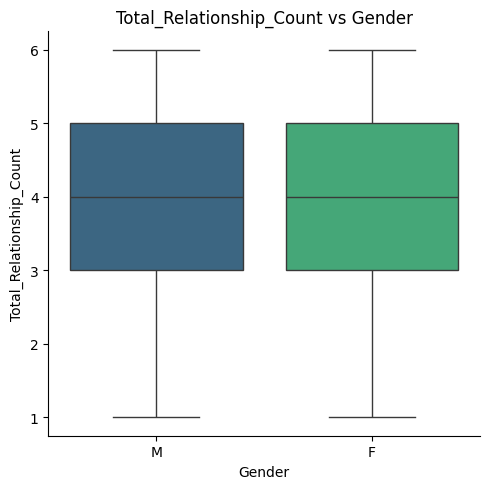

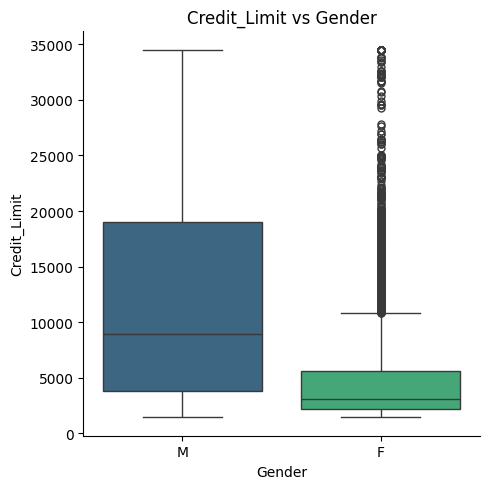

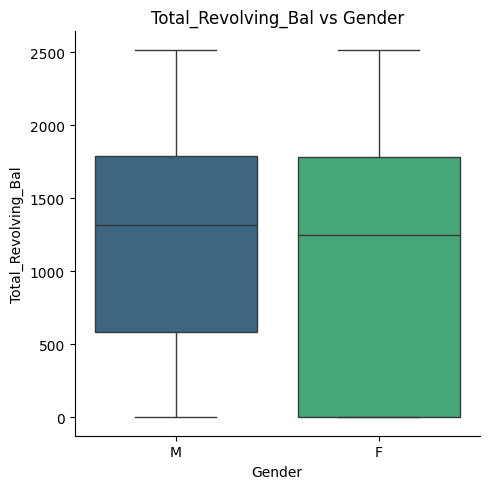

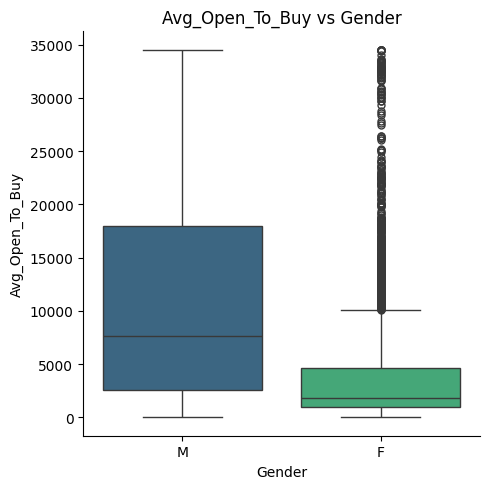

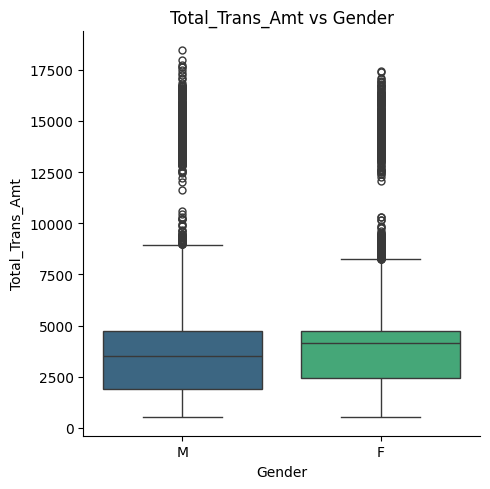

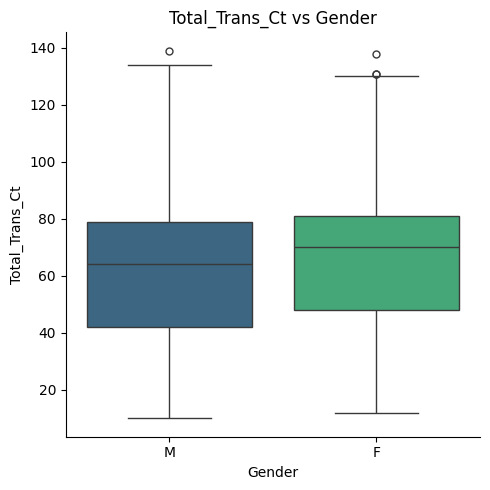

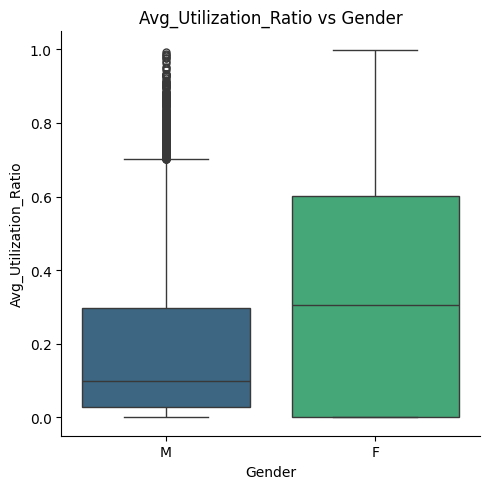

In [ ]:
# Define the numerical variables
numerical_vars = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
                     'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Avg_Utilization_Ratio']

# Creating seperate graphs for each numerical variable with family size
for var in numerical_vars:
    sns.catplot(x='Gender', y=var, data=data, kind='box', palette='viridis')
    plt.title(f'{var} vs Gender')
    # Adjust layout
    plt.tight_layout()
    plt.show()

#### **Observations**
* Females have a lower credit limit and lower average open to buy relative to males.
* Males have a slightly lower total transaction amount and count than females.
* Males have a significantly lower average utlization ratio.

#### **Conclusions**
* The lower credit limit and average open-to-buy for females compared to males suggest potential gender disparities in access to credit. This could be due to various factors such as differences in income levels, credit history, or discriminatory lending practices.

* The slightly lower total transaction amount and count for males could indicate differences in spending patterns or preferences between genders. This could be influenced by factors such as purchasing behavior, financial goals, or socio-cultural norms.

* The significantly lower average utilization ratio for males suggests that they may be more conservative in their credit utilization compared to females.

* This data may highlight potential gender-related disparities in credit access, spending behaviors, and credit management practices, underscoring the importance of promoting financial inclusion and gender equity in financial services.

#### Education Level vs Numerical Variables

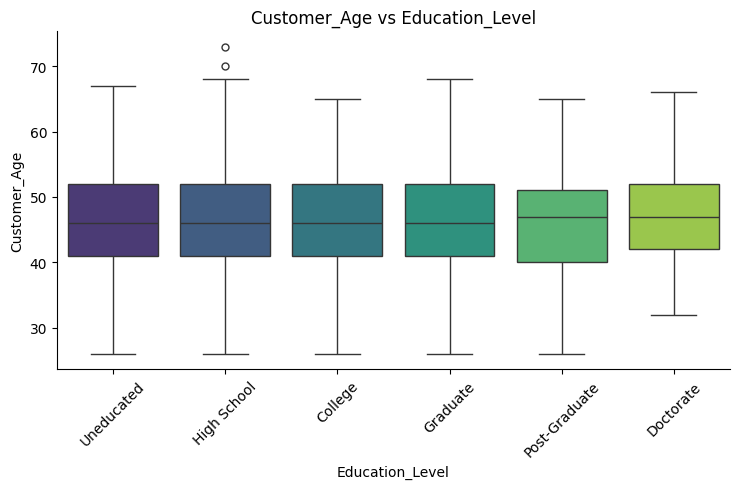

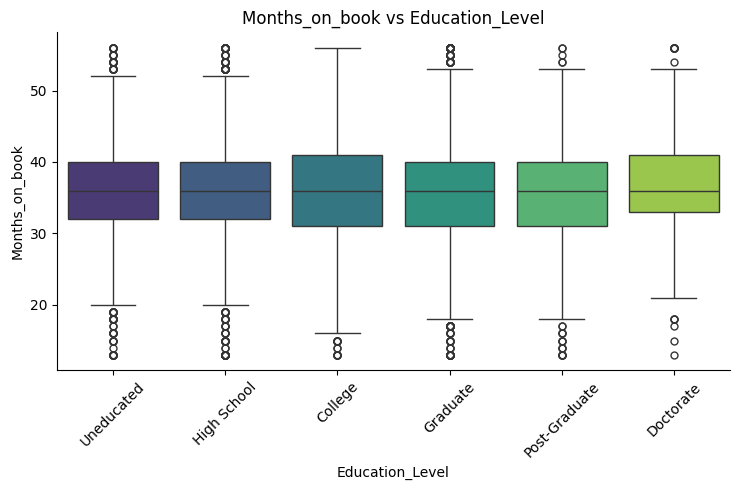

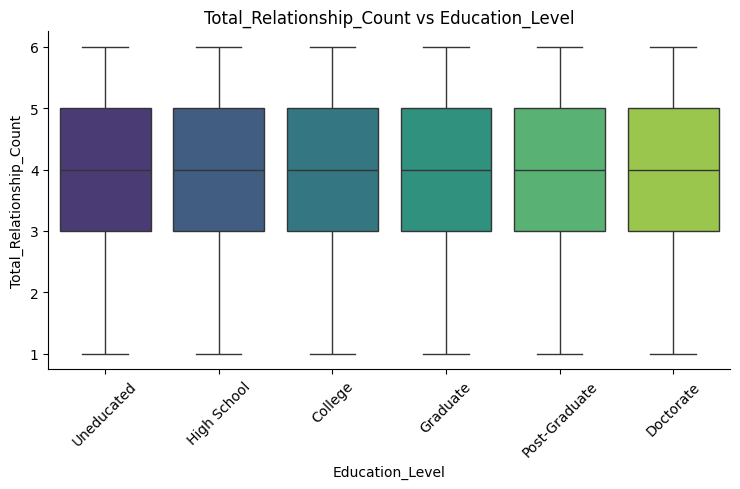

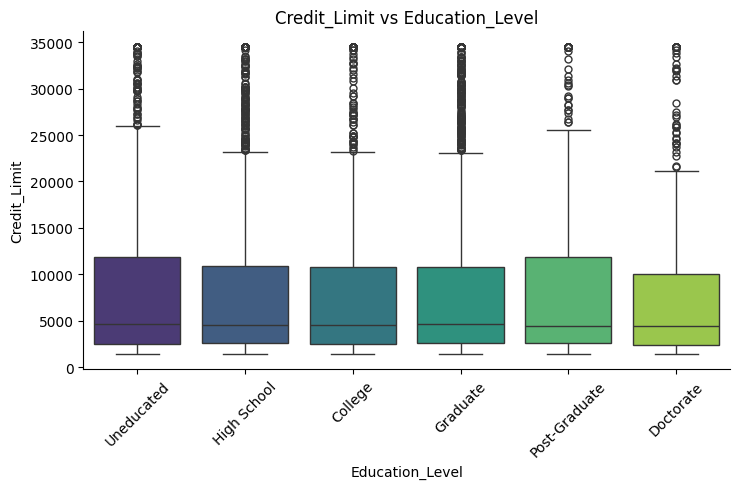

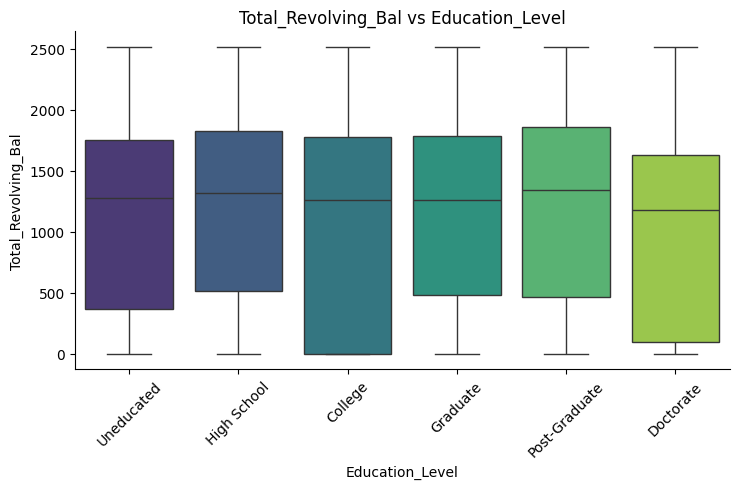

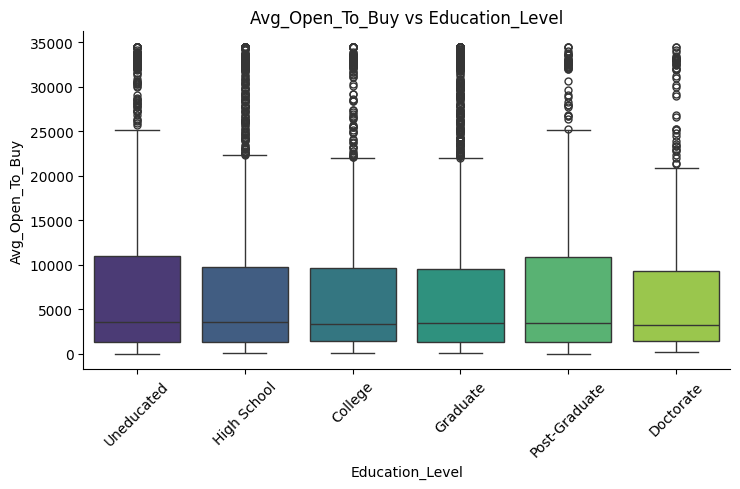

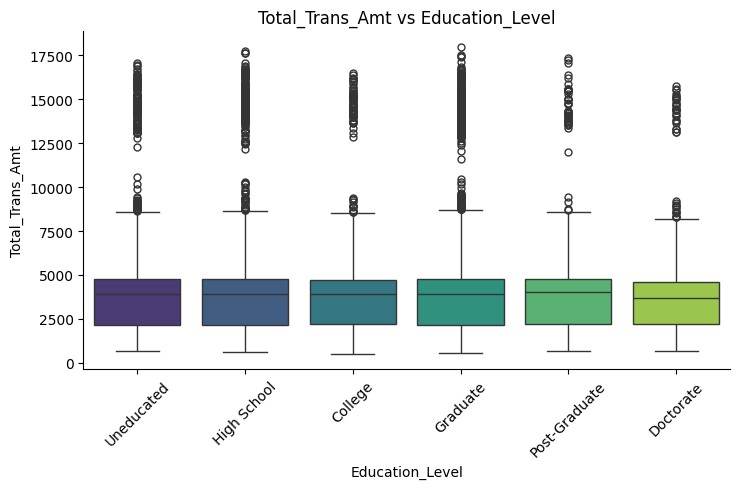

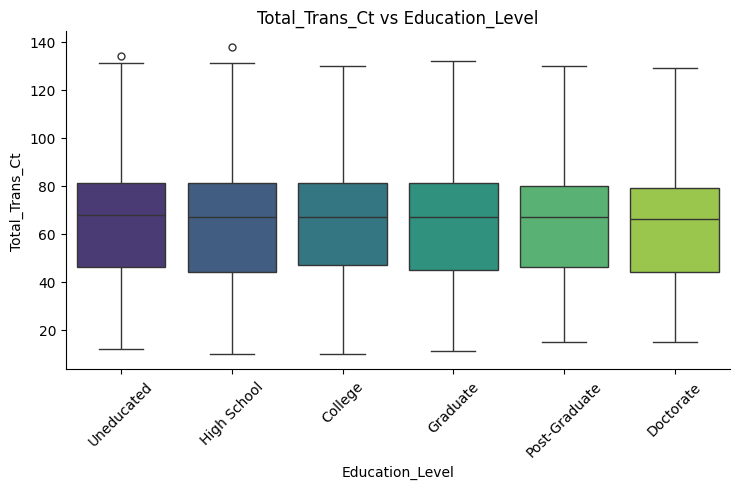

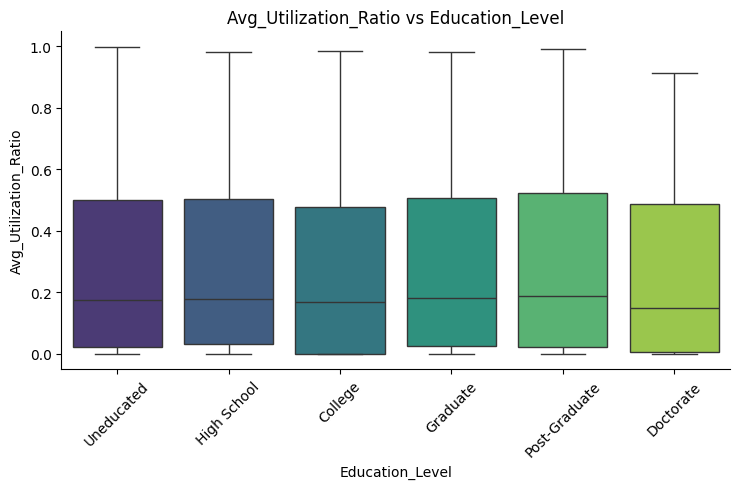

In [ ]:
# Define the order of Education_Level categories
education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']

# Creating seperate graphs for each numerical variable with education level
for var in numerical_vars:
    sns.catplot(x='Education_Level', y=var, data=df, kind='box', palette='viridis',order=education_order, aspect=1.5,legend=False)
    plt.title(f'{var} vs Education_Level')
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    # Adjust layout
    plt.tight_layout()
    plt.show()

#### **Conclusions**

* It appears that none of these varaibles have a significant impact on Education Level as most of the boxplots have fairly similar distributions across all levels of education.

#### Marital Status vs Numerical Variables

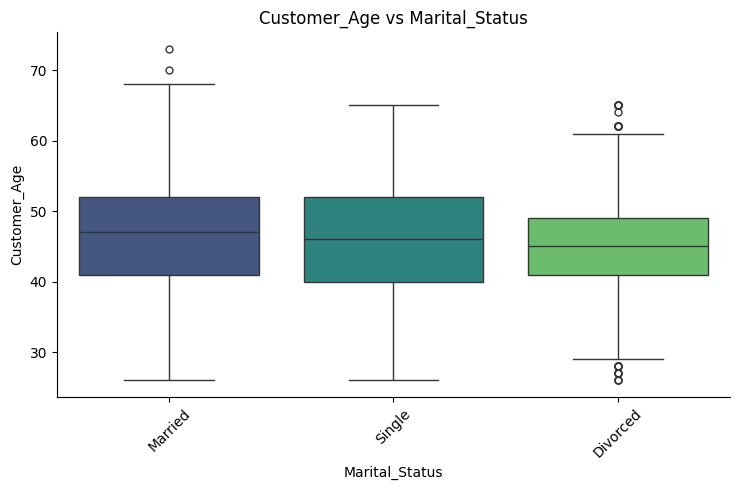

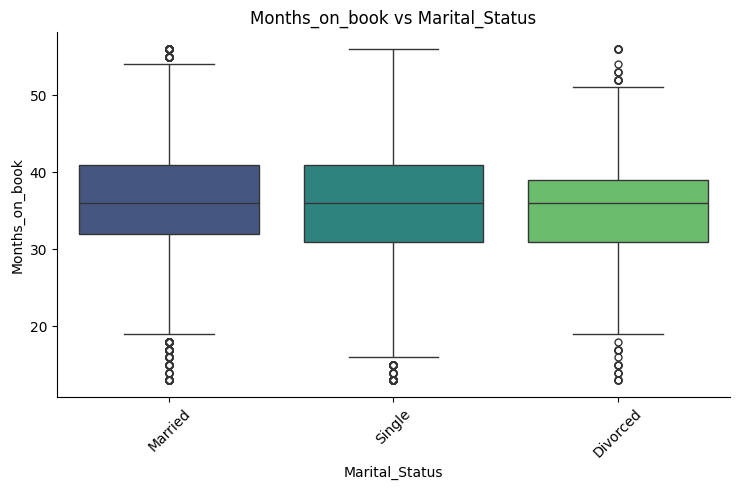

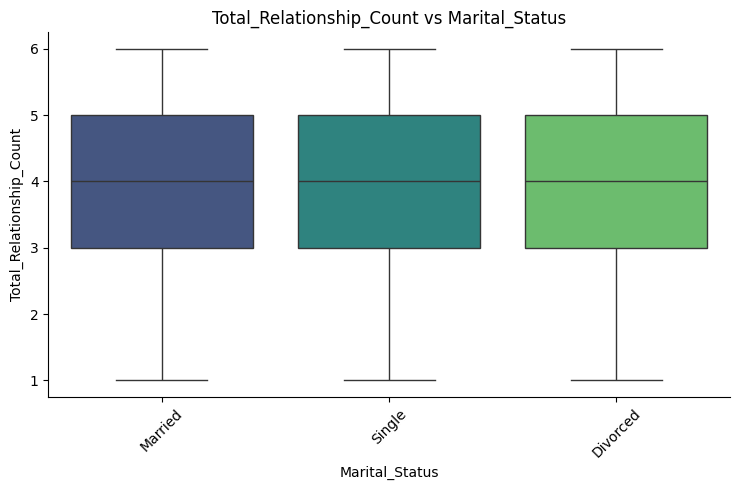

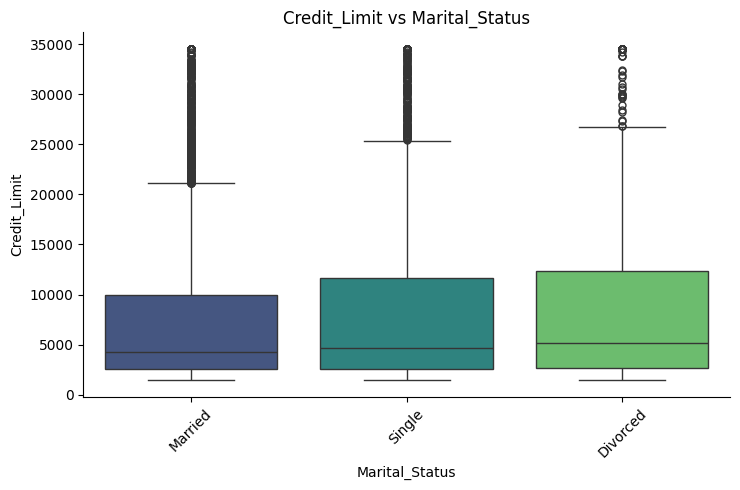

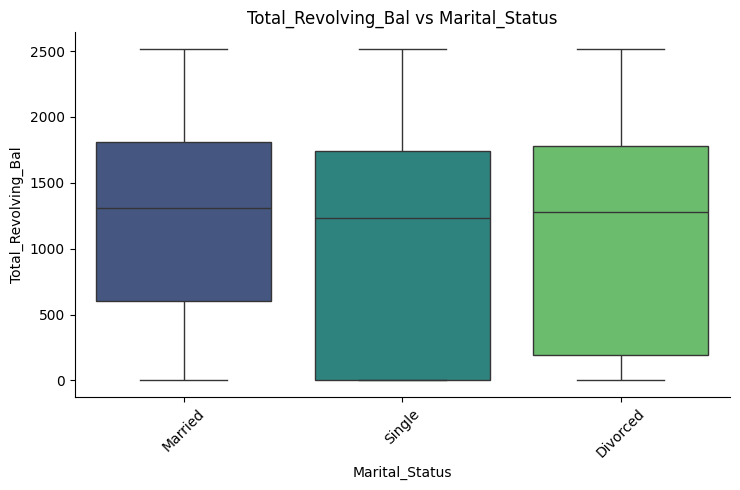

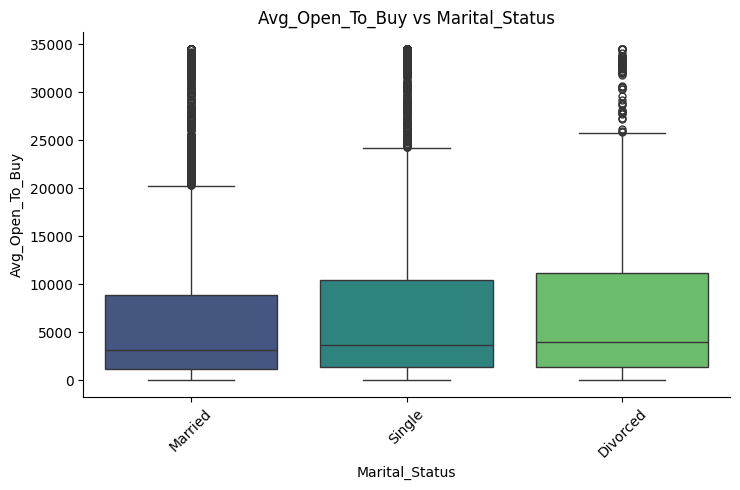

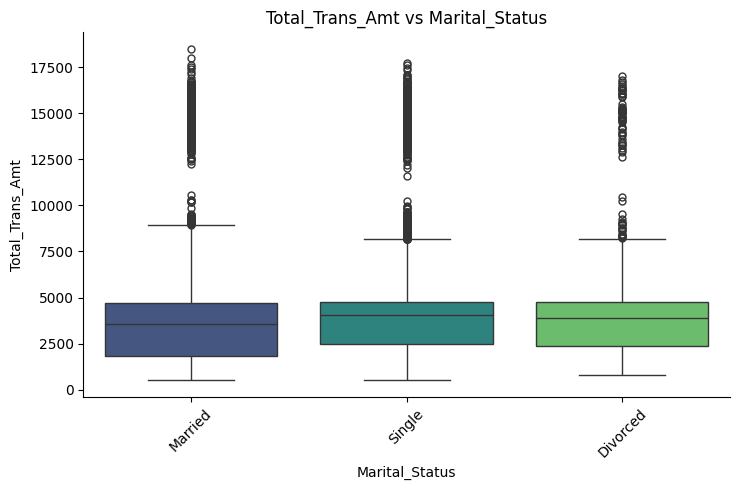

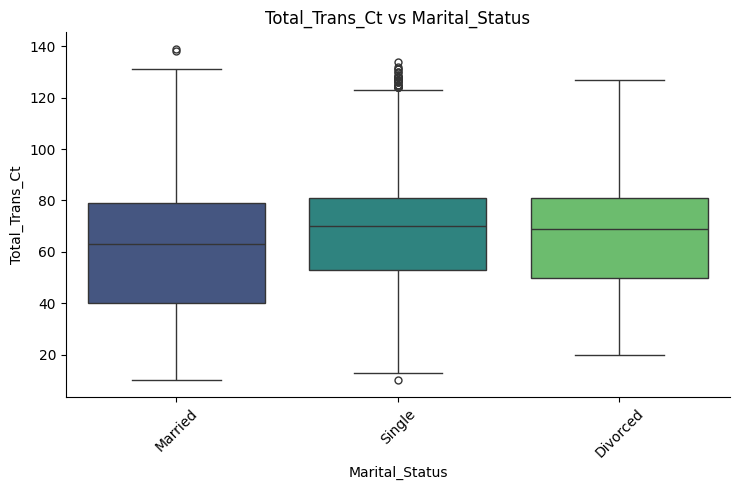

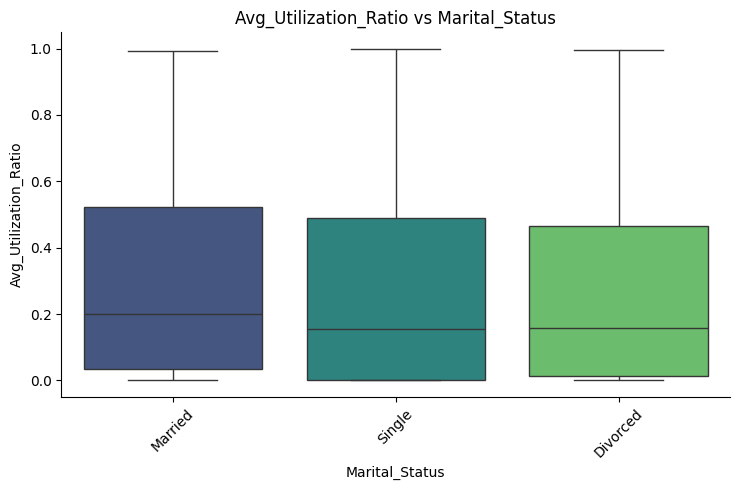

In [ ]:
# Creating seperate graphs for each numerical variable with education level
for var in numerical_vars:
    sns.catplot(x='Marital_Status', y=var, data=data, kind='box', palette='viridis', aspect=1.5,legend=False)
    plt.title(f'{var} vs Marital_Status')
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    # Adjust layout
    plt.tight_layout()
    plt.show()

#### **Observations**
* Married customers have the highest total revolving balance and have less variability within the data.
* Single and divorced customers have a slightly higher total transaction count and total transaction amount.



#### **Conclusions**

* Married customers may have less total transactions or less amounts spent because they are sharing finances with a spouse. Therefore, some the purchases may be bought by the spouse on their own credit card, as opposed to single/divorced customers who would be paying for everything themselves.

#### Income Category vs Numerical Variables

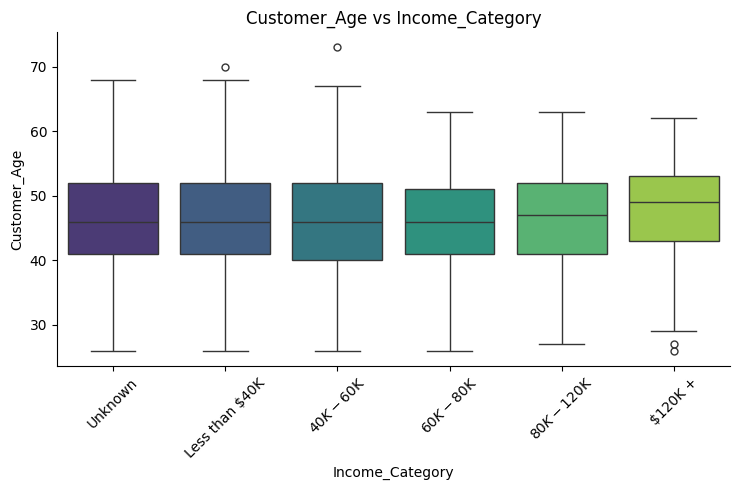

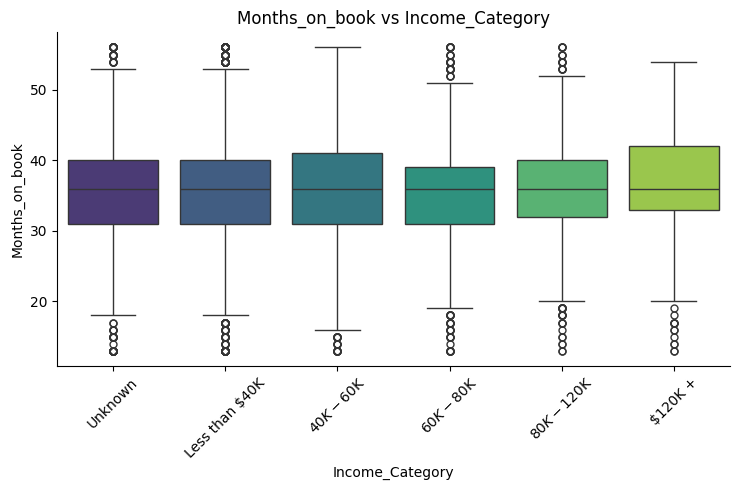

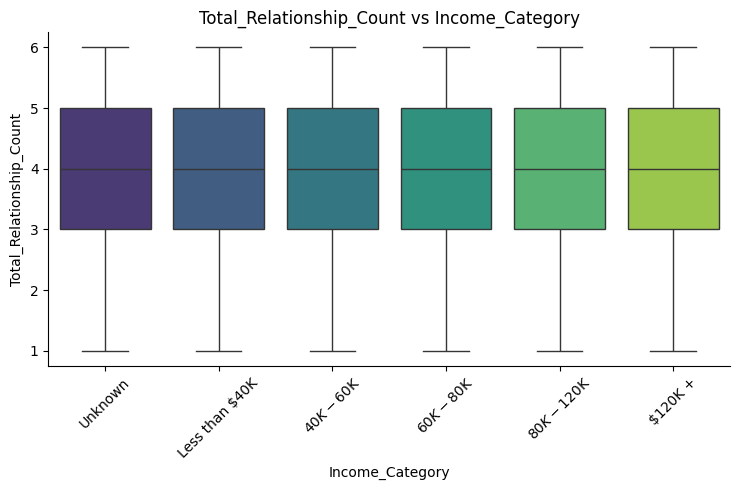

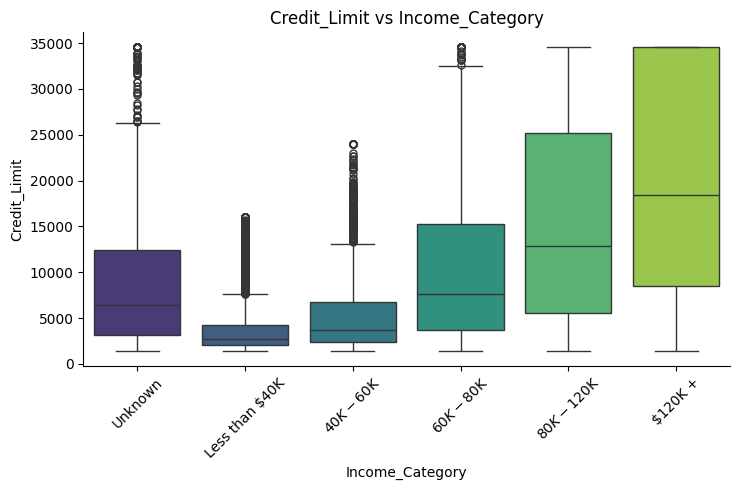

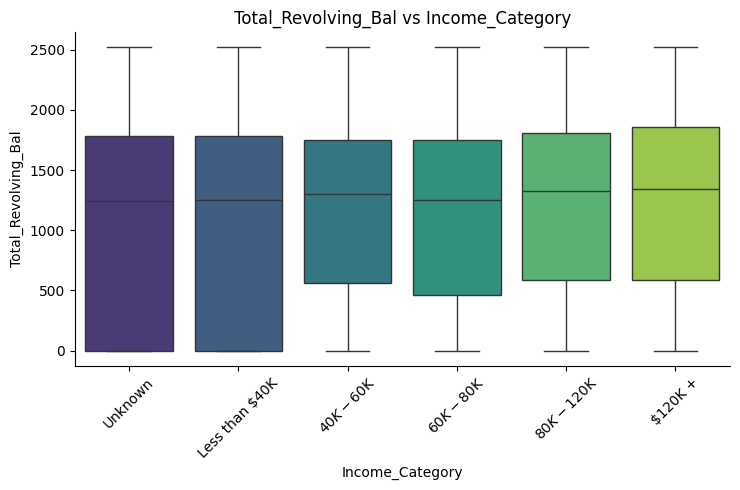

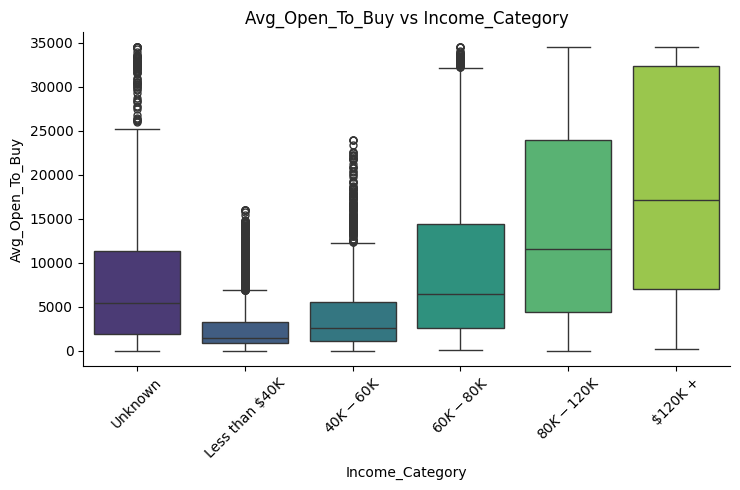

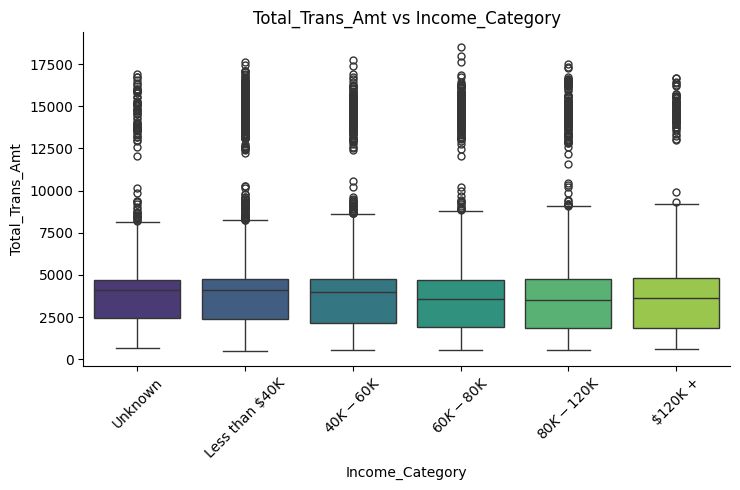

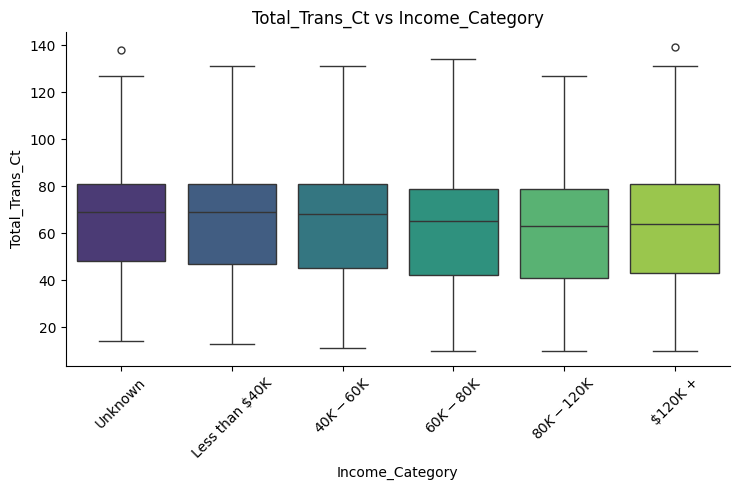

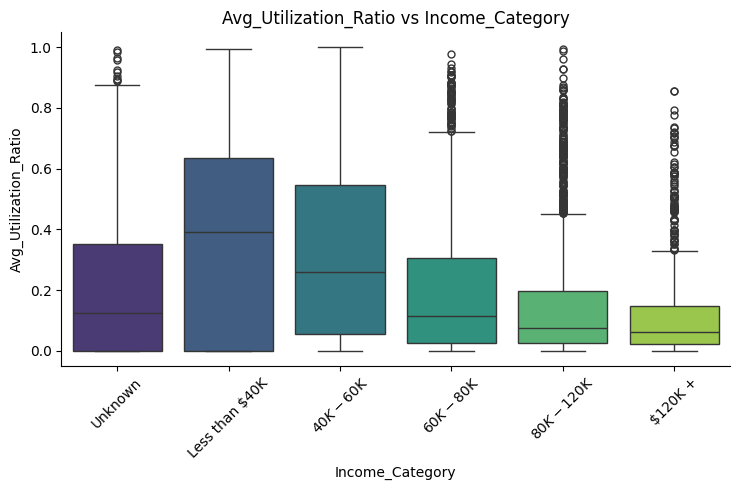

In [ ]:
# Creating seperate graphs for each numerical variable with education level
income_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']

#Income Category vs Numerical Variables
for var in numerical_vars:
    sns.catplot(x='Income_Category', y=var, data=data, kind='box', palette='viridis', order=income_order, aspect=1.5,legend=False)
    plt.title(f'{var} vs Income_Category')
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    # Adjust layout
    plt.tight_layout()
    plt.show()

#### **Observations:**
* Customers with incomes 120K + have the highest Credit_Limit, Avg_Open_To_Buy, and Avg_Utilization_Ratio, on average. On the other hand customers with less than 40K have the lowest in all of these categories.

#### **Conclusions:**
* Higher Income:
  * Customers with higher incomes may be perceived as lower credit risks by the bank, leading to higher credit limits and open-to-buy amounts.
  * Higher income stability typically makes them more likely to repay their debts.
  * Despite having higher credit limits, they might not use all of it which would lead to a lower average utilization ratio.
* Lower Incomes
  * Customers with lower incomes may have more financial constraints, limiting their access to credit or their ability to manage credit effectively.
  * This could lead to lower credit limits and open-to-buy amounts, as well as higher utilization ratios as they may rely more heavily on credit to meet their financial needs.




#### Dependent Count vs Variables


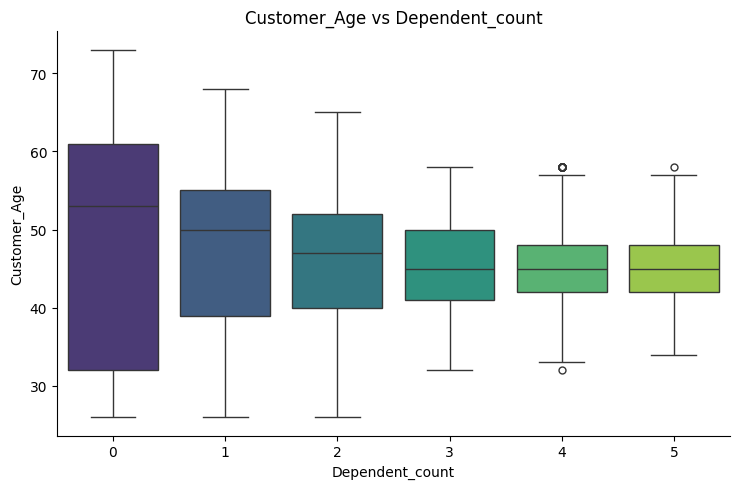

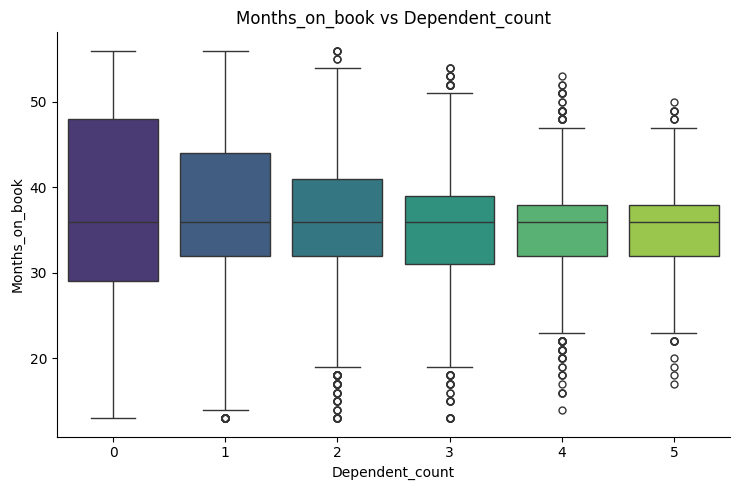

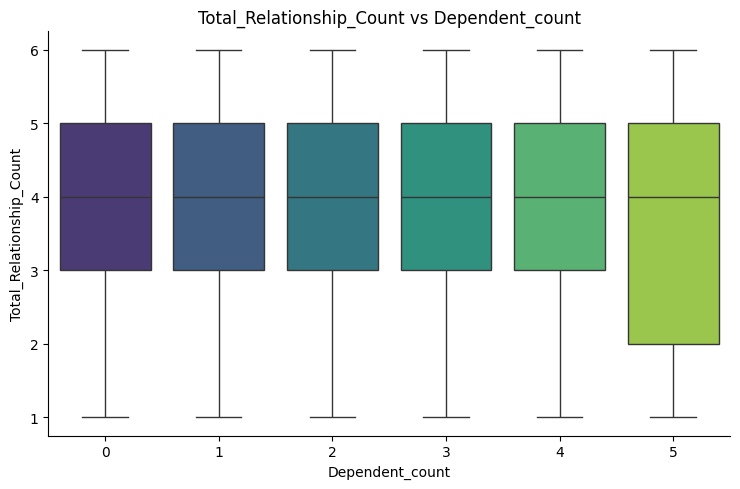

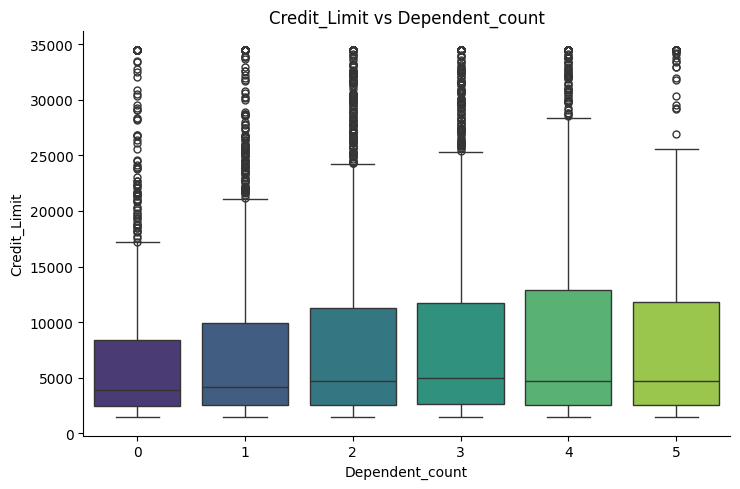

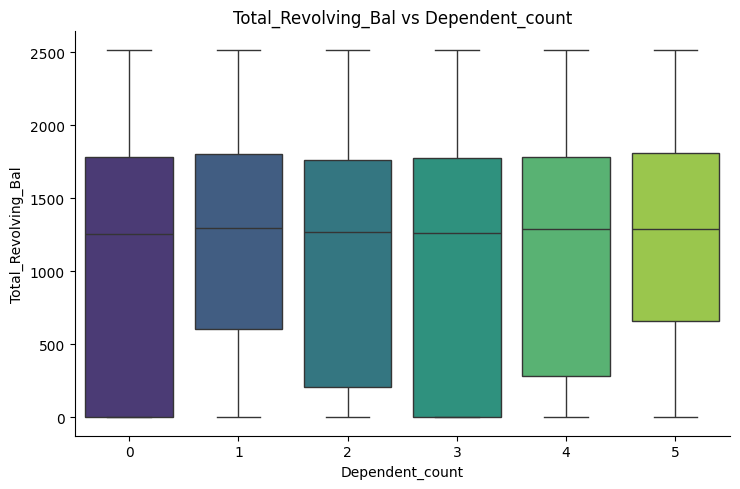

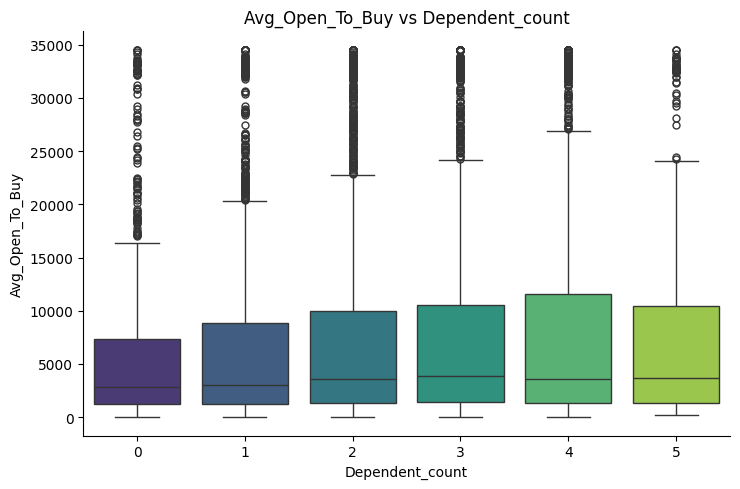

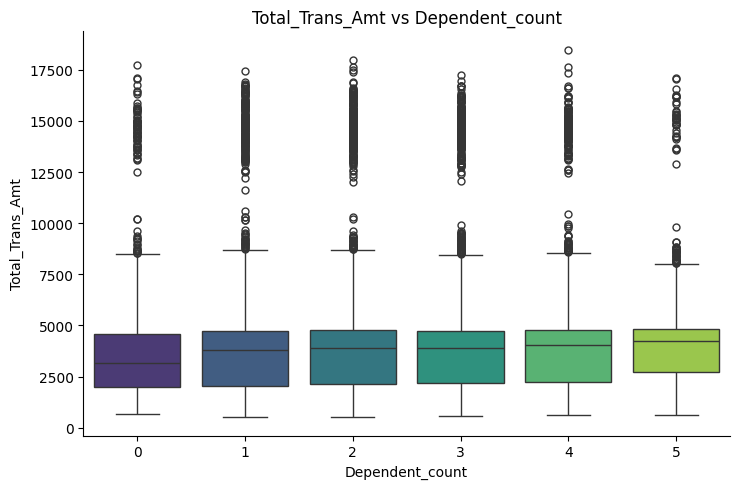

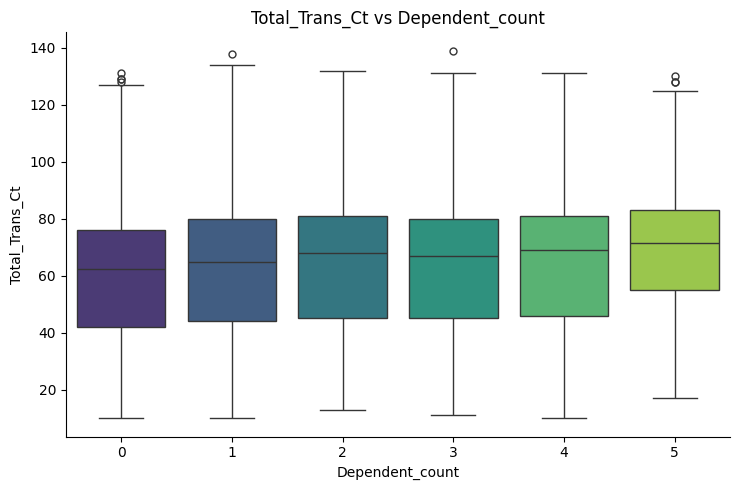

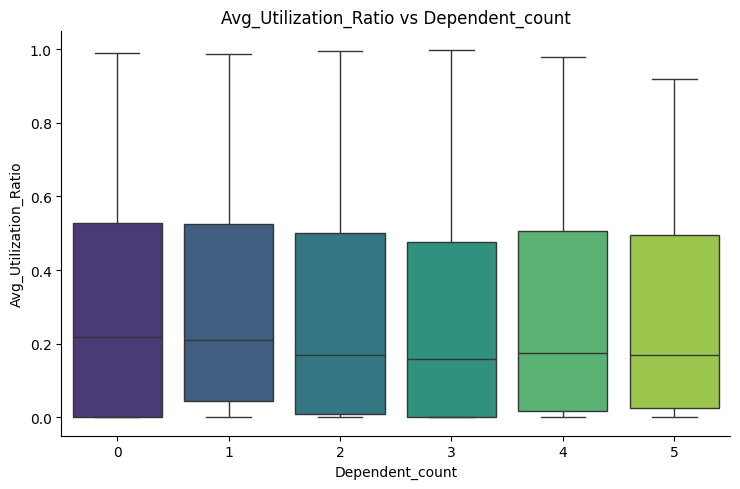

In [ ]:
# Dependent Count vs Variables
for var in numerical_vars:
    sns.catplot(x='Dependent_count', y=var, data=data, kind='box', palette='viridis', aspect=1.5,legend=False)
    plt.title(f'{var} vs Dependent_count')
    # Adjust layout
    plt.tight_layout()
    plt.show()

#### **Conclusions:**
* Although there is some varaibility in the data, it doesn't appear that these varaibles have a significant impact on dependent count as most of the boxplots have similar central tendencies.

## Data Pre-processing

### Outlier Detection

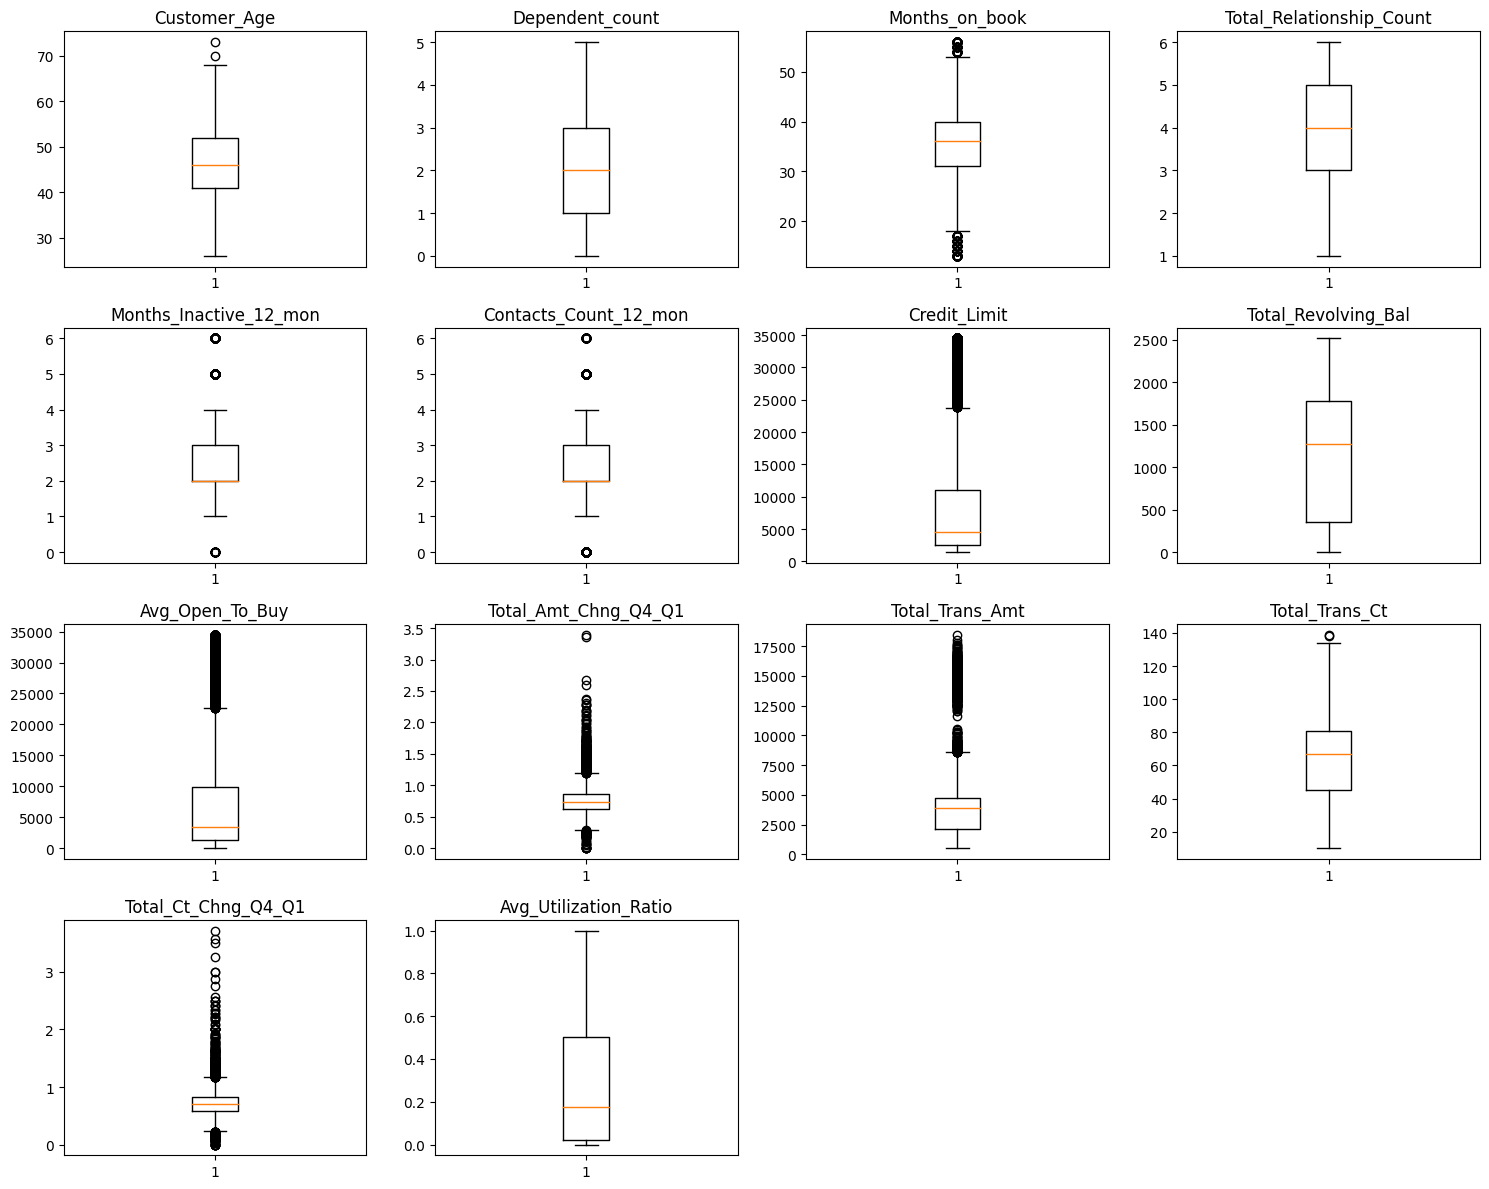

In [ ]:
import numpy as np

#outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,12))

for i, variable in enumerate(numeric_columns):
  plt.subplot(4,4, i + 1)
  plt.boxplot(data[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show()

In [ ]:
# Selecting Numerical Columns
numeric_data = data.select_dtypes(include=['number'])

# Checking for outliers
Q1 = numeric_data.quantile(0.25)  # Calculate the 25th percentile
Q3 = numeric_data.quantile(0.75)  # Calculate the 75th percentile
IQR = Q3 - Q1  # Calculate the interquartile range
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# Finding % of outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

#### **Observations:**
* Customer_Age: With a percentage of outliers at 0.02%, this indicates a minimal presence of potential outliers in the age of customers.

* Months_on_book: With a percentage of outliers at 3.81%, this suggests that some customers may have unusually long or short durations of holding a bank account.

* Months_Inactive_12_mon: With 3.27% outliers, this suggests that there is a deviation from the typical number of inactive months among customers.

* Contacts_Count_12_mon: With 6.21% outliers, it suggests that some customers have an unusually high or low number of contacts with the bank within the last 12 months.

* Credit_Limit and Avg_Open_To_Buy: These features have relatively higher percentages of outliers at 9.72% and 9.51%, respectively, indicating potential anomalies in credit limits and available credit amounts.

* Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1: Both features have outliers accounting for approximately 3.91% and 3.89%, respectively, suggesting potential irregularities in the change in transaction amounts and transaction counts between quarters.

* Total_Trans_Amt: This feature has 8.85% outliers, indicating a large amount of variation in total transaction amounts made by customers.


#### **Conclusions:**
* The outliers we observed in various features indicate that our dataset covers a wide range of customer behaviors and traits.
* These outliers might represent different types of customers with unique characteristics or behaviors.
* We should keep these data points in our set as they could give us valuable insights into specific groups of customers or behaviors.
* Analyzing these outliers can help us make better decisions and tailor our strategies to different customer segments.





### Train-Test Split

In [ ]:
# create a copy of the dataframe
data1 = df.copy()

In [ ]:
# replacing missing values with NaaN
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
# checking null value count
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting the data into train and validation set:

#first we split the data into train and temporart sets in the ratio 80:20
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=.2, random_state=1, stratify=y)

#then we split temporary set into test and validation sets in ratio 75:25
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (8101, 19)
Validation set shape: (507, 19)
Test set shape: (1519, 19)


## Missing value imputation




In [ ]:
# checking for missing values again
data1.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [ ]:
# list of columns that nneed imputation
col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[col_for_impute] = imputer.fit_transform(X_train[col_for_impute])

# Transform the validation data, impute missing values in X_val
X_val[col_for_impute]  =  imputer.transform(X_val[col_for_impute])

# Transform the test data, impute missing values in X_test
X_test[col_for_impute] = imputer.transform(X_test[col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

* All missing values have been treated.

### Checking Counts for Each Category for Train/Validation, and Test Set

In [ ]:
# Train Dataset
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4288
M    3813
Name: count, dtype: int64
******************************
Education_Level
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: count, dtype: int64
******************************
Marital_Status
Married     4376
Single      3139
Divorced     586
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: count, dtype: int64
******************************
Card_Category
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: count, dtype: int64
******************************


In [ ]:
# Validation Dataset
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    260
M    247
Name: count, dtype: int64
******************************
Education_Level
Graduate         246
High School       85
Uneducated        73
College           56
Post-Graduate     27
Doctorate         20
Name: count, dtype: int64
******************************
Marital_Status
Married     292
Single      185
Divorced     30
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    228
$40K - $60K       100
$60K - $80K        75
$80K - $120K       75
$120K +            29
Name: count, dtype: int64
******************************
Card_Category
Blue        468
Silver       30
Gold          8
Platinum      1
Name: count, dtype: int64
******************************


In [ ]:
# Test Dataset
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4288
M    3813
Name: count, dtype: int64
******************************
Education_Level
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: count, dtype: int64
******************************
Marital_Status
Married     4376
Single      3139
Divorced     586
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: count, dtype: int64
******************************
Card_Category
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: count, dtype: int64
******************************


###Encoding Categorical Variables

In [ ]:
#impute missing values in X_train
X_train = pd.get_dummies(X_train, drop_first=True)

#impute missing values in X_val
X_val = pd.get_dummies(X_val, drop_first=True)

#impute missing values in X_test
X_test = pd.get_dummies(X_test, drop_first=True)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (8101, 29)
Validation set shape: (507, 29)
Test set shape: (1519, 29)


In [ ]:
# Convert boolean columns to integers
X_train = X_train.astype(int)
X_val = X_val.astype(int)
X_test = X_test.astype(int)

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (507, 29) (1519, 29)


* After encoding there are 29 columns.

In [ ]:
# check the top 10 rows from the train dataset
X_train.head(10)

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
3105            53                2              37                         5   
3721            44                4              37                         4   
3389            50                3              41                         4   
3552            50                1              30                         6   
398             55                0              49                         5   
2625            36                2              36                         3   
5870            49                3              41                         5   
2225            46                4              36                         4   
6021            52                3              39                         5   
8491            49                3              32                         1   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
3105                       3                      4          7282   
3721                       3                      3          5826   
3389                       2                      2          2563   
3552                       2                      3          9771   
398                        3                      3          3805   
2625                       1                      4          5550   
5870                       2                      3          8051   
2225                       2                      2          6370   
6021                       3                      2          3302   
8491                       3                      3          5400   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
3105                    0             7282                     0   
3721                    0             5826                     0   
3389                 1860              703                     0   
3552                 1776             7995                     0   
398                  2233             1572                     1   
2625                 1518             4032                     1   
5870                 2138             5913                     0   
2225                    0             6370                     0   
6021                 2517              785                     0   
8491                 1426             3974                     0   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3105             3364              69                    0   
3721             3756              73                    0   
3389             3774              83                    0   
3552             2778              53                    0   
398              1743              27                    0   
2625             2540              62                    0   
5870             4370              83                    0   
2225             1783              40                    0   
6021             2682              47                    0   
8491             4643              80                    0   

      Avg_Utilization_Ratio  Gender_M  Education_Level_Doctorate  \
3105                      0         0                          0   
3721                      0         0                          0   
3389                      0         0                          0   
3552                      0         1                          0   
398                       0         1                          0   
2625                      0         1                          0   
5870                      0         1                          0   
2225                      0         0                          0   
6021                      0         0                          0   
8491                      0         0                          0   

      Education_Level_Graduate  Education_Level_High School  \
3105                         1                            0   
3721                         1                 

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9823348694316436
Random forest: 1.0
GBM: 0.8456221198156681
Adaboost: 0.825652841781874
dtree: 1.0

Validation Performance:

Bagging: 0.7654320987654321
Random forest: 0.8024691358024691
GBM: 0.8641975308641975
Adaboost: 0.8271604938271605
dtree: 0.8271604938271605


In [ ]:
# Determining difference betwen training and validation performance for original data
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9823, Validation Score: 0.7654, Difference: 0.2169
Random forest: Training Score: 1.0000, Validation Score: 0.8025, Difference: 0.1975
GBM: Training Score: 0.8456, Validation Score: 0.8642, Difference: -0.0186
Adaboost: Training Score: 0.8257, Validation Score: 0.8272, Difference: -0.0015
dtree: Training Score: 1.0000, Validation Score: 0.8272, Difference: 0.1728


#### **Observations:**

* Bagging and Random Forest models achieved high recall on the training set but showed slightly lower recall on the validation set.
* Gradient Boosting (GBM) and Adaboost models demonstrated decent performance with recall scores on both training and validation sets.
* Decision Tree model exhibited perfect recall on the training set but lower recall on the validation set.

#### **Conclusions:**
* The Random Forest model shows perfect accuracy on the training data, which likely indicates overfitting, especially considering its lower validation accuracy.
* While models achieved high accuracy and precision, recall is prioritized to ensure the maximum detection of potential customer attrition.

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Build models on oversampled data
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9979408736578909
Random forest: 1.0
GBM: 0.9733784380055891
Adaboost: 0.963376967201059
dtree: 1.0

Validation Performance:

Bagging: 0.8765432098765432
Random forest: 0.8888888888888888
GBM: 0.9135802469135802
Adaboost: 0.8765432098765432
dtree: 0.8518518518518519


In [ ]:
# Determining difference betwen training and validation performance for oversampled data
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9979, Validation Score: 0.8765, Difference: 0.1214
Random forest: Training Score: 1.0000, Validation Score: 0.8889, Difference: 0.1111
GBM: Training Score: 0.9734, Validation Score: 0.9136, Difference: 0.0598
Adaboost: Training Score: 0.9634, Validation Score: 0.8765, Difference: 0.0868
dtree: Training Score: 1.0000, Validation Score: 0.8519, Difference: 0.1481


#### **Observations:**

* Bagging, Random Forest, GBM, and Adaboost models demonstrated consistent performance with high recall on both training and validation sets.
* Decision Tree model exhibited perfect recall on the training set but lower recall on the validation set.
* GBM and Adaboost models showed a slight increase in recall compared to the original data.

#### **Conclusions:**
* Bagging, Random Forest, GBM, and Adaboost models demonstrate consistent and robust performance with high recall on both the training and validation sets. This indicates that these models are effective at identifying potential customer attrition across different datasets.
* The Decision Tree model exhibits perfect recall on the training set but lower recall on the validation set, suggesting potential overfitting. Despite performing well on the training data, its performance does not generalize well to unseen data.
* GBM and Adaboost models show a slight increase in recall compared to the original data when trained on the oversampled dataset. There models still maintain relatively small differences between training and validation scores, indicating good generalization. This suggests that these models are capable of capturing patterns in the data without overfitting.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9946236559139785
Random forest: 1.0
GBM: 0.9685099846390169
Adaboost: 0.9508448540706606
dtree: 1.0

Validation Performance:

Bagging: 0.9259259259259259
Random forest: 0.9506172839506173
GBM: 0.9629629629629629
Adaboost: 0.9876543209876543
dtree: 0.9135802469135802


In [ ]:
# Determining difference betwen training and validation performance for undersampled data
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9946, Validation Score: 0.9259, Difference: 0.0687
Random forest: Training Score: 1.0000, Validation Score: 0.9506, Difference: 0.0494
GBM: Training Score: 0.9685, Validation Score: 0.9630, Difference: 0.0055
Adaboost: Training Score: 0.9508, Validation Score: 0.9877, Difference: -0.0368
dtree: Training Score: 1.0000, Validation Score: 0.9136, Difference: 0.0864


#### **Observations:**
* Bagging, Random Forest, GBM, and Adaboost models demonstrated consistent performance with high recall on both training and validation sets.
* Decision Tree model exhibited perfect recall on the training set but lower recall on the validation set. Training score of 1.00 suggests some overfitting within the model.
* The difference in recall between training and validation sets was smaller compared to oversampled data, indicating more balanced performance.

#### **Conclusions:**

* Bagging and Decision Tree models display higher differences between training and validation scores, suggesting potential overfitting.
* Adaboost demonstrates the smallest difference, indicating better generalization.
* Overall, Adaboost models appear to be the most suitable for this dataset, with strong performance on both training and validation sets and minimal overfitting.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Tuning AdaBoost using Original Data

In [ ]:
# Tuning the AdaBoost model using original data
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8202623047450632:
CPU times: user 4.34 s, sys: 372 ms, total: 4.71 s
Wall time: 1min 50s


In [ ]:
# Creating new pipeline with best parameters
tuned_adb = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) # Completed the code with the best parameters obtained from tuning

tuned_adb.fit(X_train,y_train) ## fitting the model on original data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train, y_train)
adb_train

Accuracy  Recall  Precision    F1
0     0.973   0.886      0.940 0.912

In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

Accuracy  Recall  Precision    F1
0     0.976   0.901      0.948 0.924

#### **Observations:**
* AdaBoost model tuned using the original data achieved high performance on both the training and validation sets.
* The model achieved an accuracy of approximately 97% on both the training and validation sets, indicating strong overall predictive power.
*  High recall scores (around 89% on training, 90% on validation) indicate the model's ability to identify customers likely to attrite, and recision scores of approximately 94% demonstrate the model's reliability in correctly predicting attrition.
* The model achieves a balanced F1 score of around 91%, indicating a good trade-off between capturing attrition cases and minimizing false alarms.


#### **Conclusions:**
* While the model achieved high accuracy and precision, its primary focus on recall ensures suggests it can effectively predict customer attrition.
* Despite strong performance, there's a potential risk of overfitting,leading to poor generalization on unseen data. Further evaluation may be required to address potential overfitting issues.

### Tuning AdaBoost using Undersampled Data

In [ ]:
# Tuning for AdaBoost using Undersampled Data
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9424108458591217:
CPU times: user 2.12 s, sys: 141 ms, total: 2.26 s
Wall time: 43.7 s


In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 75, learning_rate=0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) # Completed the code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un,y_train_un) ## Complete the code to fit the model on undersampled data

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=75, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train2 = model_performance_classification_sklearn(tuned_ada2, X_train_un, y_train_un)
adb_train2

Accuracy  Recall  Precision    F1
0     0.970   0.974      0.966 0.970

In [ ]:
# Checking model's performance on validation set
adb_val2 = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)
adb_val2

Accuracy  Recall  Precision    F1
0     0.947   0.963      0.765 0.852

#### **Observations:**
* On the training set, the tuned AdaBoost model achieves an accuracy of 97.0% and a recall of 97.4% on the training set, indicating high performance in correctly identifying instances of attrition.


* On the validation set, the tuned AdaBoost model maintains strong performance with an accuracy of 94.7% and a recall of 96.3%, suggesting effective identification of attrition cases while maintaining high overall accuracy.

#### **Conclusions:**
* The tuned AdaBoost model demonstrates strong performance in identifying instances of attrition, with high recall scores on both the training and validation sets.
* The chosen hyperparameters, including the number of estimators, learning rate, and base estimator, contribute to the model's effectiveness in capturing patterns related to customer attrition.

* The model's performance on the validation set suggests its ability to generalize well to unseen data, indicating its potential to accurately predict customer attrition.

* Further analysis of precision, particularly in minimizing false positives, could offer deeper insights into overall performance.

### Tuning Gradient Boosting using Original Data

In [ ]:
# Tuning for Gradient Boosting Using Original Data
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8064279398762156:
CPU times: user 5.15 s, sys: 658 ms, total: 5.8 s
Wall time: 2min 58s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9
) # Completed the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(
    tuned_gbm2, X_train, y_train
)
gbm2_train

Accuracy  Recall  Precision    F1
0     0.964   0.840      0.929 0.883

In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

Accuracy  Recall  Precision    F1
0     0.966   0.852      0.932 0.890

#### **Observations:**
* The cross-validated recall score obtained with the best parameters is approximately 0.8064, indicating moderate performance in identifying instances of attrition.
* On the training set, the tuned Gradient Boosting model achieves an accuracy of 96.4% and a recall of 84.0%, suggesting high performance in correctly classifying instances of attrition.
* On the validation set, this model achieves an accuracy of 96.8% and a recall of 85.2%, indicating effective identification of instances of attrition while maintaining a high level of overall accuracy.

#### **Conclusions:**

* The chosen tuning method enhances the effectiveness of the Gradient Boosting model for detecting attrition-related patterns, although the recall score is slightly lower than previous models.
* Its performance on the validation set indicates good generalization to new data, suggesting potential for predicting customer attrition.
* Further analysis of precision and recall trade-offs could offer additional insights into overall performance.

### Tuning Gradient Boosting using Undersampled Data

In [ ]:
# Tuning for Gradient Boosting using Undersampled Data

%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9439463601532567:
CPU times: user 2.8 s, sys: 283 ms, total: 3.08 s
Wall time: 1min 16s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
) # Completed the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

Accuracy  Recall  Precision    F1
0     0.965   0.971      0.960 0.966

In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

Accuracy  Recall  Precision    F1
0     0.939   0.963      0.736 0.834

#### **Observations:**
* The CV Score obtained with the best parameters is approximately 0.9439, indicating strong performance in identifying instances of attrition.
* On the training set, the tuned Gradient Boosting model achieves an accuracy of 96.5% and an outstanding recall of 97.1%, indicating highly accurate identification of attrition cases.
* OOn the validation set, the tuned Gradient Boosting model maintains robust performance with an accuracy of 93.9% and a recall of 96.3%, demonstrating effective identification of attrition instances while maintaining a high overall accuracy.

#### **Conclusions:**
* The tuned Gradient Boosting model demonstrates strong performance in identifying instances of attrition when trained on undersampled data.
* The selected hyperparameters help the model effectively detect patterns linked to customer attrition, leading to high recall scores.
* The model's performance on the validation set suggests that it can generalize well to unseen data, indicating its potential for accurately predicting customer attrition.
* Further evaluation of the model's precision and recall trade-off could provide additional insights into its overall performance.

### Tuning Gradient Boosting using Oversampled Data

In [ ]:
# Tuning for Gradient Boosting using Oversampled Data
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9463175778037485:
CPU times: user 8.49 s, sys: 1.09 s, total: 9.58 s
Wall time: 4min 36s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm3 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.05,
    n_estimators=50,
    subsample=0.7,
) # Completed the code with the best parameters obtained from tuning

tuned_gbm3.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=50, random_state=1, subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm3_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm3_train

Accuracy  Recall  Precision    F1
0     0.951   0.973      0.931 0.952

In [ ]:
# Checking model's performance on validation set
gbm3_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm3_val

Accuracy  Recall  Precision    F1
0     0.939   0.963      0.736 0.834

#### **Observations:**
* The tuned Gradient Boosting model with oversampled data demonstrates strong performance in identifying instances of attrition, achieving a high recall score of 0.973 on the training set.
* However, the model's performance on the validation set shows a slightly lower recall score of 0.963, but the precision is significantly lower. This suggests challenges in maintaining precision while identifying potential attriting customers.



#### **Conclusions:**
* The model demonstrates effectiveness in identifying customers likely to churn, aligning with the business objective of maximizing retention efforts. However, the slightly lower precision on the validation set indicates the need for refining the model to minimize false positives.

* Despite some challenges in precision on the validation set, the model still shows promise in identifying customers at risk of attrition.
* Further optimization may enhance its ability to generalize to unseen data and improve its ability to accurately predict customer attrition.


### Tuning XGBoost Model using Original Data

In [ ]:
# XGB Boost Model Tuning Using Original Data
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) # fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9139610963748893:
CPU times: user 4.15 s, sys: 358 ms, total: 4.51 s
Wall time: 56.6 s


In [ ]:
## best parameters obtained from tuning
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=75,
    learning_rate=0.05,
    gamma=1,
) # Completed the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking the model's performance on the training set
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train, y_train) ## Complete the code to check the performance on original train set
xgb_train

Accuracy  Recall  Precision    F1
0     0.964   0.978      0.829 0.897

In [ ]:
# Checking the model's performance on the  validation set
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val) ## Complete the code to check the performance on validation set
xgb_val

Accuracy  Recall  Precision    F1
0     0.945   0.951      0.762 0.846

#### **Observations:**

* The tuned XGBoost model with original data achieves a high recall score of 0.978, indicating its effectiveness in identifying instances of customer attrition. However, there is a notable disparity in precision, with a score of 0.829, suggesting some false positives in the predictions on the training set.

* On the validation set, the model maintains a high recall score of 0.951, indicating its ability to identify potential attriting customers. However, there's a decrease in precision to 0.762, highlighting challenges in maintaining precision while identifying attrition cases on unseen data.


#### **Conclusions:**
* The model demonstrates effectiveness in identifying customers at risk of attrition, with a high recall score on both the training and validation sets.
* However, the lower precision on both sets suggests the presence of false positives, which could impact the efficiency of retention strategies.
* Further optimization of the model's hyperparameters may be necessary to improve its ability to accurately predict customer attrition.


## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T, #gradient undersampled data
        gbm2_train.T, #gradient with original data
        gbm3_train.T, #gradient with oversampled data
        adb_train.T, #adaboost with original data
        adb_train2.T, #adaboost with oversampled data
        xgb_train.T, #XGB with original data
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient Boosting Trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "Adaboosting trained with Original Data",
    "Adaboosting trained with Undersampled Data",
    "XGBoost trained with Original Data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient boosting trained with Undersampled data  \
Accuracy                                              0.965   
Recall                                                0.971   
Precision                                             0.960   
F1                                                    0.966   

           Gradient Boosting Trained with Original data  \
Accuracy                                          0.964   
Recall                                            0.840   
Precision                                         0.929   
F1                                                0.883   

           Gradient boosting trained with Oversampled data  \
Accuracy                                             0.951   
Recall                                               0.973   
Precision                                            0.931   
F1                                                   0.952   

           Adaboosting trained with Original Data  \
Accuracy                                    0.973   
Recall                                      0.886   
Precision                                   0.940   
F1                                          0.912   

           Adaboosting trained with Undersampled Data  \
Accuracy                                        0.970   
Recall                                          0.974   
Precision                                       0.966   
F1                                              0.970   

           XGBoost trained with Original Data  
Accuracy                                0.964  
Recall                                  0.978  
Precision                               0.829  
F1                                      0.897

### Validation Performance Comparison

In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T,
     gbm2_val.T,
      gbm3_val.T,
      adb_val.T,
      adb_val2.T,
      xgb_val.T], axis=1,
)
models_train_comp_df.columns =  [
    "Gradient boosting trained with Undersampled data",
    "Gradient Boosting Trained with Original data",
    "Gradient boosting trained with Oversampled data",
    "Adaboosting trained with Original Data",
    "Adaboosting trained with Undersampled Data",
    "XGBoost trained with Original Data",
]

print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


Gradient boosting trained with Undersampled data  \
Accuracy                                              0.939   
Recall                                                0.963   
Precision                                             0.736   
F1                                                    0.834   

           Gradient Boosting Trained with Original data  \
Accuracy                                          0.966   
Recall                                            0.852   
Precision                                         0.932   
F1                                                0.890   

           Gradient boosting trained with Oversampled data  \
Accuracy                                             0.939   
Recall                                               0.963   
Precision                                            0.736   
F1                                                   0.834   

           Adaboosting trained with Original Data  \
Accuracy                                    0.976   
Recall                                      0.901   
Precision                                   0.948   
F1                                          0.924   

           Adaboosting trained with Undersampled Data  \
Accuracy                                        0.947   
Recall                                          0.963   
Precision                                       0.765   
F1                                              0.852   

           XGBoost trained with Original Data  
Accuracy                                0.945  
Recall                                  0.951  
Precision                               0.762  
F1                                      0.846

#### **Observations:**

* Recall: Adaboosting with Undersampled Data consistently demonstrates higher recall scores compared to XGBoost on both training and validation sets, indicating its effectiveness in identifying potential churners.

* Generalization: Adaboosting, despite being trained on undersampled data, performs well on both training and validation sets. Its ability to generalize to unseen data is evident from its strong performance on the validation set.

* Precision: Adaboosting exhibits slightly higher precision on the validation set compared to XGBoost. While this lower precision score may indicate a potential for more false positives, its higher recall suggests it effectively identifies more instances of attrition, which aligns with the business objective of maximizing recall.

#### **Conclusions:**

* Adaboosting trained with Undersampled Data emerges as the preferred model for predicting customer attrition. Its consistently higher recall scores, along with good generalization performance, make it well-suited for identifying potential churners and implementing targeted retention strategies.

* While maintaining precision is crucial for ensuring effective interventions, the slightly lower precision score is outweighed by its superior recall.
* Therefore, from a business perspective, Adaboosting with Undersampled Data is recommended as the optimal model for this scenario.

### Test set final performance

In [ ]:
# checking performance on test set for Adaboost with Undersampling
ada_test = model_performance_classification_sklearn(tuned_ada2, X_test, y_test)
ada_test

Accuracy  Recall  Precision    F1
0     0.924   0.959      0.688 0.801

#### **Observations:**
**Based on the test set final performance metrics for Adaboosting with Undersampled Data:**

* Accuracy: The model achieved an accuracy of 92.4%, indicating that it correctly classified approximately 92.4% of the instances in the test set.

* Recall: The recall score is 95.9%, suggesting that the model successfully identified 95.9% of the actual positive instances (attrited customers) in the test set.

* Precision: The precision score is 68.8%, indicating that out of all the instances predicted as positive by the model, only 68.8% were actually true positives. This suggests that the model may have a relatively high rate of false positives.

* F1 Score: The F1 score, is 80.1%. This provides a balance between precision and recall, with higher values indicating better overall performance.

#### **Conclusions:**
* In summary, Adaboosting with Undersampled Data shows strong performance in terms of accuracy and recall on the test set. However, its precision is relatively lower, indicating a higher rate of false positives.
* This performance is in line with what we achieved with this model on the train and validation sets, so this is good a generalized model.


####Feature Importance

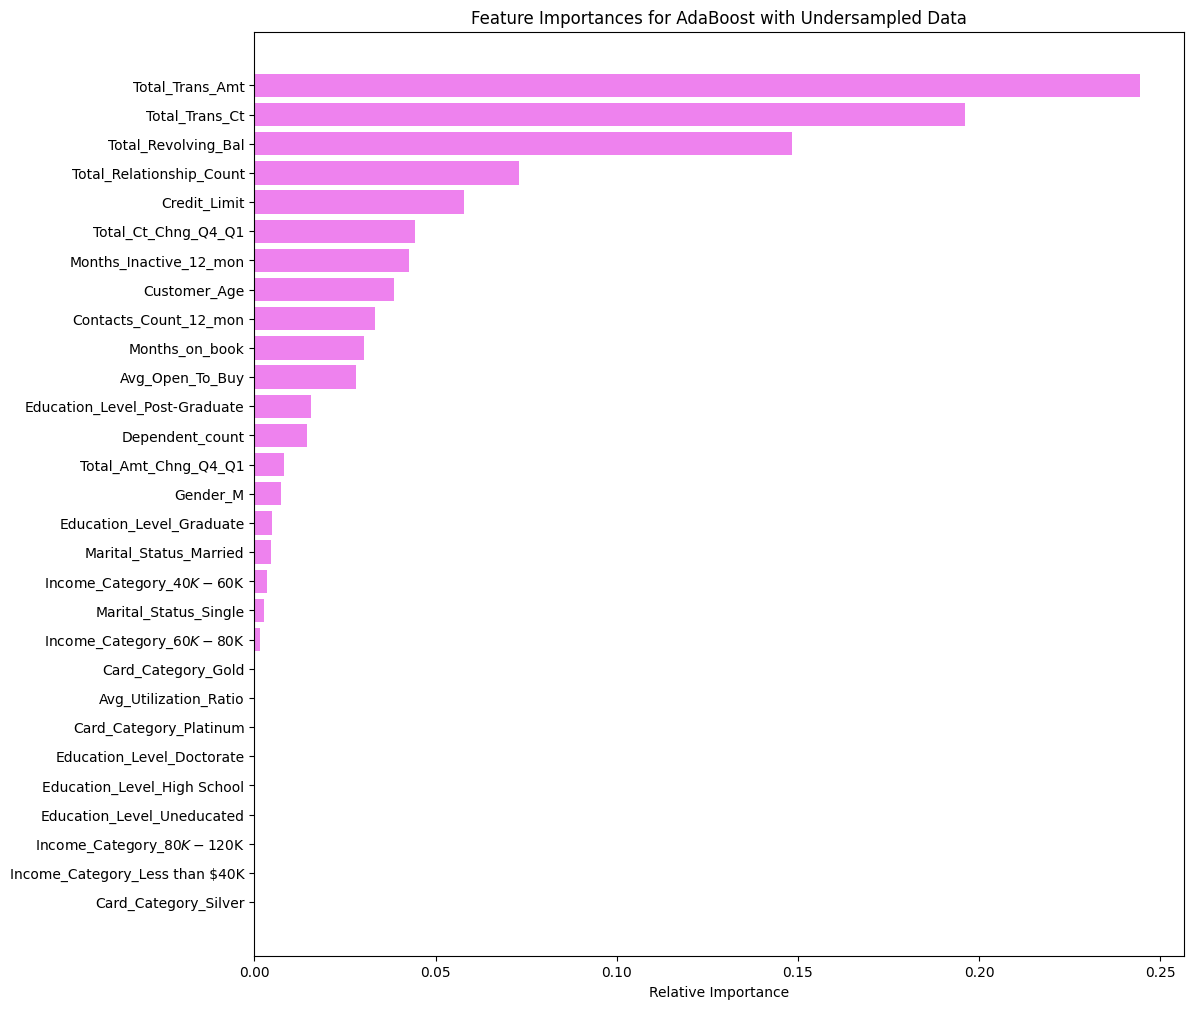

In [ ]:
#finding feature importances
feature_names = X_train.columns
importances =  tuned_ada2.feature_importances_ #checking the feature importance of the best model
indices = np.argsort(importances)

#plotting the chart
plt.figure(figsize=(12, 12))
plt.title("Feature Importances for AdaBoost with Undersampled Data")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


#### **Conclusions:**
* We can see that Total_Trans_Amt, Total_Trans_Ct, and Total_Revolving_Bal are the most important features for making predictions on whether a customer will attrite or not.

# Business Insights and Conclusions

***

###**Insights:**

* **Spending Behavior and Credit Utilization:** There's a clear association between lower Total Transaction Amount, Total Transaction Count, and Total Revolving Balances and attrition, suggesting that active credit card usage reduces the likelihood of attrition. Additionally, the positive relationship between Total Transaction Count and Average Open To Buy indicates that customers with higher available credit tend to conduct more transactions, highlighting the correlation between credit availability and spending behavior.

* **Financial Behavior and Income Level:** Attrition rates are higher among customers in lower income categories, as evidenced by the elevated attrition rates among customers with incomes Less than 40K. This is possibly due to limited disposable income for credit card spending or payment. Furthermore, customers with lower average utilization ratios, likely indicate reduced spending or account closure, appear to be more likely to attrite. This emphasizes the importance of addressing financial constraints and priorities among lower-income segments to reduce attrition risk.


* **Engagement and Inactivity:** The length of customer inactivity significantly impacts attrition rates, with longer inactive periods over the last 12 months correlating with higher attrition rates. Implementing targeted reactivation campaigns and engagement initiatives can help re-engage inactive customers and prevent attrition, thereby fostering long-term relationships with the bank.

* **Product Portfolio Relationship Counts:** Customers with lower relationship counts are more likely to attrite, emphasizing the importance of diversifying the product portfolio and implementing bundled product offerings and cross-selling strategies.

* **Education Level and Income Mobility:** The distribution suggests a potential trend of upward mobility, where customers with higher education levels tend to have higher incomes. This could indicate that education plays a role in income attainment and financial stability.


### **Business Recommendations:**

* **Tailored Credit Management Tools:** Develop personalized credit management tools targeting customers with lower spending patterns and total revolving balances to improve financial health and reduce attrition risk. Simultaneously, leverage rewards and promotions to incentivize increased transactions among customers with higher credit limits, enhancing overall engagement and satisfaction.

* **Retention Strategies for Low Spenders:** Implement retention strategies focused on encouraging increased spending among customers with lower transaction amounts. If bankers see that clients are spending less on average, encourage them to reach out to their clients to offer targeted incentives, rewards, or exclusive benefits to incentivize higher usage of credit cards and enhance customer engagement.

* **Engagement Campaigns for Existing Customers:** Enhance engagement programs for existing customers by doing yearly campaigns with exclusive offers, rewards, and loyalty programs to encourage continued usage and foster long-term relationships. We can leverage transaction count and amount changes as a metric to identify engaged customers and tailor retention initiatives accordingly.

* **Financial Wellness Programs for Lower Income Segments:** Develop financial wellness programs targeting lower-income customers to improve financial literacy and stability, reducing attrition risk. Provide educational resources and personalized financial advice to support customers in managing their finances effectively.

* **Reactivation Campaigns for Inactive Customers:** Implement targeted reactivation campaigns to re-engage inactive customers and prevent attrition. Offer incentives, promotions, or personalized offers during the termination process, as well as the months following termination to encourage them to resume their interactions with the bank's products and services.

* **Product Bundling and Cross-Selling Strategies:** Leverage insights from relationship counts to develop bundled product offerings and cross-selling strategies. Encourage customers to diversify their product portfolio with the bank by promoting complementary products and services, thereby increasing their overall engagement and loyalty.

* **Education and Income-Linked Initiatives:**  Launch initiatives promoting education and income mobility among customers. Offer scholarships or career development workshops to support customers in advancing their education and career prospects, ultimately leading to higher income levels and greater financial stability. This could work especially well with current college students (student discounts) or customers with student loans (loan repayment services).  

* **Targeted Marketing Campaigns:** Run campaigns targeted towards existing bank customers not actively participating in credit card services. Offer incentives such as cash back rewards or discounts on travel to encourage sign-ups for credit card services, thereby increasing overall engagement and loyalty.

* **Expand Research:** The bank should expand their research on causes for attrition. There are many outside factors such as financial stability, personal expenses, and unique circumstances that could cause customers to churn. Conducting an exit survey as a client is cancelling their credit card requiring the customer to provide their reasoning for cancelling would help the bank further understand their consumers.

### **Conclusion:**
* Implementing these targeted recommendations will enable the bank to effectively address attrition risk factors identified through analysis, ultimately enhancing customer retention and fostering long-term relationships. By understanding customer spending behavior, financial constraints, and engagement preferences, the bank can tailor strategies to meet the evolving needs of its diverse customer base, driving sustainable growth and profitability.


In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving AML_Project_LearnerNotebook_FullCode (1).ipynb to AML_Project_LearnerNotebook_FullCode (1).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>